# Explore

## Contents

- [Updates](#Updates)
- [Wrangle](#Wrangle)
- [Target](#Target)
- [Recoder](#Recoder)
- [Merge Learn_by Cols](#Merge-Learn_by-Cols)
- [Ctgy_cols](#Ctgy_cols)
- [Quant_cols](#Quant_cols)
- [Excludes](#Excludes)
- [Col_lists](#Col_lists)
- [Countplot](#Countplot)
- [Tricols](#Tricols)
- [Chi2](#Chi2)

## Updates
[*Back to top*](#Contents)

In [1]:
# Python updates

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import itertools as it
import re

In [2]:
# Local updates

import sys
sys.path.append('')
import wrangle
import explore

In [3]:
 # Jupyter notebooks only #
def ifull(obj):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        display(obj)

## Wrangle
[*Back to top*](#Contents)

In [4]:
df, dictdf = wrangle.wrangle_data()
print(df.shape)
display(df.head(5))
ifull(df.describe().T)

(726, 87)


,job_title,job_taxo,job_id,job_conduct_res,job_analyze_res,job_buy_res_report,job_manage_res_proj,job_observe_res,job_plan_res,job_teach_res,...,session_workshop,session_network,session_social_event,session_qa,sesson_topic_tables,other_conference_types,ideal_topics,ideal_attendees,recommendations,persona_id
resp_id,,,,,,,,,,,,,,,,,,,,,
284,Academic,4,1.0,3,2,0,3,3,3,3,...,2,3,2,2,2,NaN,research-practice connections,NaN,research-practice connections,2
288,Academic,4,1.0,1,2,1,3,3,3,3,...,3,3,1,1,2,NaN,NaN,NaN,Don’t create schedule conflicts with other rel...,2
294,Academic,4,1.0,3,3,1,3,1,3,3,...,2,2,2,2,2,NaN,NaN,NaN,Looking forward! \n,2
281,Academic,4,1.0,3,4,0,2,3,2,0,...,3,2,2,3,2,NaN,"Research design, innovative methods, communica...",NaN,NaN,2
280,Academic,4,1.0,3,3,0,1,1,3,2,...,3,2,1,2,2,You should consider the combination of confere...,NaN,NaN,NaN,2


,count,mean,std,min,25%,50%,75%,max
job_conduct_res,726.0,2.856749,1.025941,0.0,3.0,3.0,4.0,4.0
job_analyze_res,726.0,2.913223,0.939210,0.0,3.0,3.0,3.0,4.0
job_buy_res_report,726.0,0.402204,0.720686,0.0,0.0,0.0,1.0,4.0
job_manage_res_proj,726.0,2.600551,1.166285,0.0,2.0,3.0,3.0,4.0
job_observe_res,726.0,1.982094,1.134273,0.0,1.0,2.0,3.0,4.0
job_plan_res,726.0,2.931129,0.950177,0.0,3.0,3.0,4.0,4.0
job_teach_res,726.0,1.845730,1.236637,0.0,1.0,2.0,3.0,4.0
job_advocate_res,726.0,2.924242,1.056235,0.0,3.0,3.0,4.0,4.0
job_hire_res_vendor,726.0,0.776860,0.914143,0.0,0.0,1.0,1.0,4.0
job_lead_res_team,726.0,1.860882,1.486931,0.0,0.0,2.0,3.0,4.0


In [5]:
print(dictdf.shape)
display(dictdf)
ifull(dictdf.describe().T)

(90, 11)


,column_name,is_required,from_orig_file,in_wrangle,char_type,function,data_type,encoder,survey_section,question_group,question_text
qid,,,,,,,,,,,
q00,resp_id,True,True,True,numeric,identification,int64,NaN,Survey,ID,Entry Id
q01a,job_title,True,True,True,text,categorical,category,NaN,Work,Position,Title
q01b,job_taxo,True,True,True,numeric,categorical,category,NaN,Work,Position,Job Taxo ID
q01c,job_id,False,True,True,numeric,categorical,category,NaN,Work,Position,Job ID
q02a,job_conduct_res,True,True,True,numeric,quantitative,int64,often5,Work,Research Duties,Conducting Research
...,...,...,...,...,...,...,...,...,...,...,...
q21,ideal_topics,False,True,True,text,qualitative,object,NaN,Conference 2,Desired Topics,"If attending a conference about research, what..."
q22,ideal_attendees,False,True,True,text,qualitative,object,NaN,Conference 2,Desired Attendees,"If attending a conference about research, who ..."
q23,recommendations,False,True,True,text,qualitative,object,NaN,Conference 2,Conference Advice,Let’s say (hypothetically of course) that Rose...


,count,unique,top,freq
column_name,90,90,job_observe_res,1
is_required,90,2,True,61
from_orig_file,90,2,True,72
in_wrangle,90,2,True,88
char_type,90,3,numeric,75
function,90,5,quantitative,51
data_type,90,4,int64,66
encoder,69,11,important5,18
survey_section,88,8,Conference 2,24
question_group,88,24,Conference Factors,10


## Target
[*Back to top*](#Contents)

In [6]:
# Add target to dataframe
def add_target_to_df(df):
    learning_conference_int = np.array(df['learning_conference'] >1).astype('int32')
    likely_conference_int = np.array(df['likely_conference']>1).astype('int32')
    df['target'] = (learning_conference_int + likely_conference_int) / 2
    df['targetb'] = (learning_conference_int + likely_conference_int) // 2
    return df


In [7]:
df = explore.add_target_to_df(df)

In [8]:
# display(df.info())

In [9]:
tgtdf = df[[
    'learning_conference', 
    'likely_conference', 
    'target',
    'targetb'
]].copy()

# tgtdf['learning_conference_int']=learning_conference_int
# tgtdf['likely_conference_int']=likely_conference_int

for col in tgtdf.columns.sort_values():
    print(col)
    print(tgtdf[col].value_counts().sort_index())

learning_conference
0     36
1    265
2    332
3     93
Name: learning_conference, dtype: int64
likely_conference
0     48
1    157
2    191
3    225
4    105
Name: likely_conference, dtype: int64
target
0.0    152
0.5    202
1.0    372
Name: target, dtype: int64
targetb
0    354
1    372
Name: targetb, dtype: int64


## Recoder
[*Back to top*](#Contents)

In [10]:
recoder_dictionaries = {
    2: {
        "important5": 'r5to2hi', # neutral included in no
        "likely5": 'r5to2lo', # neutral included in yes
        "often4": 'r4to2', 
        "often5": 'r5to2lo', # neutral included in yes
        "tenure6": 'r6to2',
    },
    3: {
        "important5": 'r5to3',
        "likely5": 'r5to3',
        "often4": 'r4to2', # three options not practical
        "often5": 'r5to3',
        "tenure6": 'r6to3',            
    },
}

In [11]:
recoder = {
    'r2to2': {
        0: 0,
        1: 1,
    },
    'r4to2': {
        0: 0,
        1: 0,
        2: 1,
        3: 1,
    },
    'r5to2lo': {
        0: 0,
        1: 0,
        2: 1,
        3: 1,
        4: 1,
    },
    'r5to2hi': {
        0: 0,
        1: 0,
        2: 0,
        3: 1,
        4: 1,
    },
    'r5to3': {
        0: 0,
        1: 0,
        2: .5,
        3: 1,
        4: 1,
    },
    'r6to2': {
        0: 0,
        1: 0,
        2: 0,
        3: 1,
        4: 1,
        5: 1,
    },
    'r6to3': {
        0: 0,
        1: 0,
        2: .5,
        3: .5,
        4: 1,
        5: 1,
    },
}

In [12]:
# Get mapping dictionary
def get_recoder_dictionary(data_dictionary, recoder_dictionaries):
    '''
    get_recoder_dictionary(data_dictionary, recoder_dictionaries=recoder_dictionaries)

    Use this function to identify which data dictionary will be used for each 
    field when recoding. One column for each target number of fields.
    
    Activate as follows:
        check_recoder = get_recoder_dictionary(dictdf, recoder_dictionaries)
    

    Returns recoder dictionary dataframe
    '''
    recode_df = data_dictionary[['column_name','encoder']].copy().dropna()
    recode_df['col'] = recode_df.column_name
    recode_df=recode_df.set_index('column_name')
    levels = [level for level in recoder_dictionaries]
    for chk in range(len(levels)):
        level = levels[chk]
        recoder_dictionary = recoder_dictionaries[level]
        recodes = [recode for recode in recoder_dictionary]
        tempdf = recode_df[recode_df.encoder.isin(recodes)].copy()
        tempdf[level] = tempdf.encoder.apply(lambda x: recoder_dictionary[x])
        recode_df = recode_df.join(tempdf[[level]], how='left')
    recode_df = recode_df.dropna(subset=[levels[0]])
    return recode_df



In [13]:
def recode_columns(df, recode_df, recoder, outputs):
    '''
    recode_columns(df, recode_df, recoder=recoder, outputs=2)

    *** MUST HAVE RECODER DICTIONARY FILE BEFORE STARTING ***
    Use this function to make a recoded dataframe. All recode columns will be updated with the new values, other columns will remain as-is.
    Activate as follows:
        dfrecode2 = recode_columns(df, check_recoder, recoder, outputs=2)

    Returns recode dataframe
    '''
    use_df = df.copy()
    allcols=recode_df.col
    check_dicts=recode_df[outputs]
    cols=[chkcol for chkcol in allcols if chkcol in use_df.columns]
    for col in cols:
        use_dict = recoder[check_dicts[col]]
        encoded = use_df[col].apply(lambda x: use_dict[x])
        use_df[col] = encoded
    return use_df



In [14]:
def make_recode_df(
    df, data_dictionary, outputs=2, 
    recoder_dictionaries=recoder_dictionaries, recoder=recoder
    ):
    '''
    make_recode_df(
        df, data_dictionary, outputs=2, 
        recoder_dictionaries=recoder_dictionaries, recoder=recoder
    )

    Function takes wrangle data and dataframe and creates a new dataframe with
    the quantitative values recoded based on the number of outputs
    '''
    check_recoder = get_recoder_dictionary(
        data_dictionary=data_dictionary, 
        recoder_dictionaries=recoder_dictionaries
    )
    dfrecode = recode_columns(
        df=df, recode_df=check_recoder, recoder=recoder, outputs=outputs
    )
    
    return dfrecode


In [15]:
check_recode2 = explore.make_recode_df(df, dictdf)
check_recode2

,job_title,job_taxo,job_id,job_conduct_res,job_analyze_res,job_buy_res_report,job_manage_res_proj,job_observe_res,job_plan_res,job_teach_res,...,session_social_event,session_qa,sesson_topic_tables,other_conference_types,ideal_topics,ideal_attendees,recommendations,persona_id,target,targetb
resp_id,,,,,,,,,,,,,,,,,,,,,
284,Academic,4,1.0,1,1,0,1,1,1,1,...,0,0,0,NaN,research-practice connections,NaN,research-practice connections,2,1.0,1
288,Academic,4,1.0,0,1,0,1,1,1,1,...,0,0,0,NaN,NaN,NaN,Don’t create schedule conflicts with other rel...,2,1.0,1
294,Academic,4,1.0,1,1,0,1,0,1,1,...,0,0,0,NaN,NaN,NaN,Looking forward! \n,2,1.0,1
281,Academic,4,1.0,1,1,0,1,1,1,0,...,0,1,0,NaN,"Research design, innovative methods, communica...",NaN,NaN,2,1.0,1
280,Academic,4,1.0,1,1,0,0,0,1,1,...,0,0,0,You should consider the combination of confere...,NaN,NaN,NaN,2,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,UX Researcher,1,28.0,1,1,0,0,1,0,1,...,1,1,1,none,collaboration with teams,"big and small companies, seeing the scale at w...",provide tools and resources and support for ne...,5,0.0,0
879,UX Researcher,1,28.0,1,1,0,1,0,1,0,...,0,0,0,NaN,"A research team of 1, How to deal with a lot o...",NaN,Make it affordable. Somewhere in Europe. :),4,0.5,0
136,UX Researcher,1,28.0,1,1,0,1,1,1,1,...,0,0,1,"masterclasses, full day talks/trainings - whi...",how to tackle typical research problems (e.g p...,"personal friends, a variety of people - not ju...","My goal is to provide constructive criticism, ...",4,0.0,0


In [16]:
check_recoder = explore.get_recoder_dictionary(dictdf, explore.recoder_dictionaries)
check_recoder

,encoder,col,2,3
column_name,,,,
job_conduct_res,often5,job_conduct_res,r5to2lo,r5to3
job_analyze_res,often5,job_analyze_res,r5to2lo,r5to3
job_buy_res_report,often5,job_buy_res_report,r5to2lo,r5to3
job_manage_res_proj,often5,job_manage_res_proj,r5to2lo,r5to3
job_observe_res,often5,job_observe_res,r5to2lo,r5to3
job_plan_res,often5,job_plan_res,r5to2lo,r5to3
job_teach_res,often5,job_teach_res,r5to2lo,r5to3
job_advocate_res,often5,job_advocate_res,r5to2lo,r5to3
job_hire_res_vendor,often5,job_hire_res_vendor,r5to2lo,r5to3


In [17]:
dfrecode3 = explore.recode_columns(df, check_recoder, explore.recoder, outputs=3)
display(dfrecode3.head())
ifull(dfrecode3.describe().T)

,job_title,job_taxo,job_id,job_conduct_res,job_analyze_res,job_buy_res_report,job_manage_res_proj,job_observe_res,job_plan_res,job_teach_res,...,session_social_event,session_qa,sesson_topic_tables,other_conference_types,ideal_topics,ideal_attendees,recommendations,persona_id,target,targetb
resp_id,,,,,,,,,,,,,,,,,,,,,
284,Academic,4,1.0,1.0,0.5,0.0,1.0,1.0,1.0,1.0,...,0.5,0.5,0.5,NaN,research-practice connections,NaN,research-practice connections,2,1.0,1
288,Academic,4,1.0,0.0,0.5,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.5,NaN,NaN,NaN,Don’t create schedule conflicts with other rel...,2,1.0,1
294,Academic,4,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.5,0.5,0.5,NaN,NaN,NaN,Looking forward! \n,2,1.0,1
281,Academic,4,1.0,1.0,1.0,0.0,0.5,1.0,0.5,0.0,...,0.5,1.0,0.5,NaN,"Research design, innovative methods, communica...",NaN,NaN,2,1.0,1
280,Academic,4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,...,0.0,0.5,0.5,You should consider the combination of confere...,NaN,NaN,NaN,2,1.0,1


,count,mean,std,min,25%,50%,75%,max
job_conduct_res,726.0,0.811295,0.372591,0.0,1.0,1.0,1.0,1.0
job_analyze_res,726.0,0.840220,0.343342,0.0,1.0,1.0,1.0,1.0
job_buy_res_report,726.0,0.045455,0.180038,0.0,0.0,0.0,0.0,1.0
job_manage_res_proj,726.0,0.715565,0.416908,0.0,0.5,1.0,1.0,1.0
job_observe_res,726.0,0.488292,0.455844,0.0,0.0,0.5,1.0,1.0
job_plan_res,726.0,0.835399,0.340548,0.0,1.0,1.0,1.0,1.0
job_teach_res,726.0,0.457300,0.463385,0.0,0.0,0.5,1.0,1.0
job_advocate_res,726.0,0.811983,0.352500,0.0,1.0,1.0,1.0,1.0
job_hire_res_vendor,726.0,0.111570,0.294695,0.0,0.0,0.0,0.0,1.0
job_lead_res_team,726.0,0.460744,0.463318,0.0,0.0,0.5,1.0,1.0


In [18]:
dfrecode2 = explore.recode_columns(df, check_recoder, explore.recoder, outputs=2)
display(dfrecode2.head())
display(dfrecode2.describe().T)

,job_title,job_taxo,job_id,job_conduct_res,job_analyze_res,job_buy_res_report,job_manage_res_proj,job_observe_res,job_plan_res,job_teach_res,...,session_social_event,session_qa,sesson_topic_tables,other_conference_types,ideal_topics,ideal_attendees,recommendations,persona_id,target,targetb
resp_id,,,,,,,,,,,,,,,,,,,,,
284,Academic,4,1.0,1,1,0,1,1,1,1,...,0,0,0,NaN,research-practice connections,NaN,research-practice connections,2,1.0,1
288,Academic,4,1.0,0,1,0,1,1,1,1,...,0,0,0,NaN,NaN,NaN,Don’t create schedule conflicts with other rel...,2,1.0,1
294,Academic,4,1.0,1,1,0,1,0,1,1,...,0,0,0,NaN,NaN,NaN,Looking forward! \n,2,1.0,1
281,Academic,4,1.0,1,1,0,1,1,1,0,...,0,1,0,NaN,"Research design, innovative methods, communica...",NaN,NaN,2,1.0,1
280,Academic,4,1.0,1,1,0,0,0,1,1,...,0,0,0,You should consider the combination of confere...,NaN,NaN,NaN,2,1.0,1


,count,mean,std,min,25%,50%,75%,max
job_conduct_res,726.0,0.840220,0.366654,0.0,1.0,1.0,1.0,1.0
job_analyze_res,726.0,0.873278,0.332890,0.0,1.0,1.0,1.0,1.0
job_buy_res_report,726.0,0.067493,0.251047,0.0,0.0,0.0,0.0,1.0
job_manage_res_proj,726.0,0.775482,0.417552,0.0,1.0,1.0,1.0,1.0
job_observe_res,726.0,0.573003,0.494983,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
session_social_event,726.0,0.230028,0.421140,0.0,0.0,0.0,0.0,1.0
session_qa,726.0,0.406336,0.491487,0.0,0.0,0.0,1.0,1.0
sesson_topic_tables,726.0,0.573003,0.494983,0.0,0.0,1.0,1.0,1.0
target,726.0,0.651515,0.397116,0.0,0.5,1.0,1.0,1.0


## Merge Learn_by Cols
[*Back to top*](#Contents)

In [19]:
learn_by_cols = {
    'learning_talks': '12za',
    'learning_read': '12zb',
    'learning_meetup': '12zc',
    'learning_workshop': '12zd',
    'learning_conference': '12ze',
    'likely_watch_video': '12za',
    'likely_internet': '12zb',
    'likely_book': '12zb',
    'likely_online_group': '12zf',
    'likely_colleague': '12zg',
    'likely_meetup': '12zc',
    'likely_conference': '12ze',
    'likely_workshop': '12zd',
}

In [20]:
learn_by_groups = {
    '12za': 'learn_by_video', 
    '12zb': 'learn_by_reading', 
    '12zc': 'learn_by_meetup', 
    '12zd': 'learn_by_workshop', 
    '12ze': 'learn_by_conference', 
    '12zf': 'learn_by_online_group', 
    '12zg': 'learn_by_colleague', 
}
    

In [21]:
# chk_dict = learn_by_cols
# learn_by_sets = (pd.DataFrame([(chk_dict[k],k) for k in chk_dict])
#                  .sort_values(by=[0,1])
#                  .rename(columns={0:'orig_val',1:'orig_key'}))
# learn_by_sets

In [22]:
learn_by_groups

{'12za': 'learn_by_video',
 '12zb': 'learn_by_reading',
 '12zc': 'learn_by_meetup',
 '12zd': 'learn_by_workshop',
 '12ze': 'learn_by_conference',
 '12zf': 'learn_by_online_group',
 '12zg': 'learn_by_colleague'}

In [23]:
# def dict_to_df(use_dict, key_name='orig_key', value_name='orig_val', orient='index', index_col=None, dup_index=False):
#     new_df = pd.DataFrame.from_dict(use_dict, orient=orient).reset_index()
#     new_df.columns = [key_name, value_name]    
    
#     if index_col:
#         if index_col not in new_df.columns:
#             return new_df
#         if dup_index:
#             new_df['idx'] = new_df[index_col]
#             index_name = 'idx'
#         else:
#             index_name = index_col
#         new_df.set_index(index_name, inplace=True)
#     return new_df

In [24]:
# groups_df = dict_to_df(learn_by_groups, key_name='group', value_name='new_field', index_col='group')
# groups_df

In [25]:
# comingle_df = dict_to_df(
#     learn_by_cols, 
#     key_name='orig_field', 
#     value_name='group', 
#     index_col='orig_field',
#     dup_index=True
# )
# comingle_df

In [26]:
# comingle_df['new_field'] = comingle_df.group.apply(lambda x: learn_by_groups[x])
# comingle_df

In [27]:
# for group in learn_by_groups:
#     display(comingle_df[comingle_df.group==group])

In [28]:
def comingle_groups_max(df, cols_to_group, group_to_col):
    df['__make_new_idx__'] = df.index
    
    new_df = df[['__make_new_idx__']].copy()
    df.drop(columns='__make_new_idx__')
#     print(new_df.head())
#     new_df.set_index('index')
#     print(new_df.head())
    for group in group_to_col:
        new_col = group_to_col[group]
        group_cols = [col for col in cols_to_group if cols_to_group[col] == group]
        group_df = df[group_cols]
#         print(group, group_df.shape, new_df.shape)
#         group_df[new_col] = group_df.apply(max, axis=1)
        new_df[new_col] = group_df.apply(max, axis=1)
#         print(group_df.head(10))
#         print(new_df.head(2))
#         print(new_df[new_col].value_counts())
    new_df = new_df.drop(columns='__make_new_idx__')
#     print(new_df.shape)
    return new_df
        
#     max_research = df[research_columns].apply(max, axis = 1)
    

In [29]:
use_cols = [col for col in learn_by_cols]

In [30]:
comingle_df = explore.comingle_groups_max(
    df=dfrecode2[[col for col in learn_by_cols]].copy(), 
    cols_to_group=learn_by_cols, 
    group_to_col=learn_by_groups)

ifull(comingle_df)

,learn_by_video,learn_by_reading,learn_by_meetup,learn_by_workshop,learn_by_conference,learn_by_online_group,learn_by_colleague
resp_id,,,,,,,
284,0,1,1,1,1,1,1
288,1,1,1,1,1,1,1
294,1,1,1,1,1,1,1
281,1,1,1,1,1,1,1
280,1,1,0,0,1,0,1
295,1,1,1,1,1,1,1
291,0,1,1,1,1,0,1
290,1,1,1,1,1,0,1
296,1,1,0,1,1,1,1


In [31]:
dfrecode2 = dfrecode2.join(comingle_df)

In [32]:
# dfrecode2.columns

In [33]:
dfrecode2b0 = dfrecode2[dfrecode2.targetb==0].copy()
dfrecode2b0.shape

(354, 96)

In [34]:
dfrecode2b1 = dfrecode2[dfrecode2.targetb==1].copy()
dfrecode2b1.shape

(372, 96)

## Ctgy_cols
[*Back to top*](#Contents)

In [35]:
ctgy_cols = df.select_dtypes(['category']).columns
# print(type(ctgy_cols))
ctgy_cols.to_list()

['job_title',
 'job_taxo',
 'job_id',
 'num_employees',
 'num_researchers',
 'ideal_conference_size_cat',
 'ideal_structure_cat',
 'persona_id']

## Quant_cols
[*Back to top*](#Contents)

In [36]:
#Quantitative columns
quant_cols = df.select_dtypes([int,float,bool]).columns
quant_cols.to_list()

['job_conduct_res',
 'job_analyze_res',
 'job_buy_res_report',
 'job_manage_res_proj',
 'job_observe_res',
 'job_plan_res',
 'job_teach_res',
 'job_advocate_res',
 'job_hire_res_vendor',
 'job_lead_res_team',
 'company_small',
 'company_med',
 'company_large',
 'num_res_small',
 'num_res_med',
 'num_res_large',
 'exp_conduct_res',
 'exp_analyze_res',
 'exp_buy_res_report',
 'exp_manage_res_proj',
 'exp_observe_res',
 'exp_plan_res',
 'exp_teach_res',
 'exp_advocate_res',
 'exp_hire_res_vendor',
 'exp_lead_res_team',
 'research_educ_cat',
 'learning_talks',
 'learning_read',
 'learning_meetup',
 'learning_workshop',
 'learning_conference',
 'likely_watch_video',
 'likely_internet',
 'likely_book',
 'likely_online_group',
 'likely_colleague',
 'likely_meetup',
 'likely_conference',
 'likely_workshop',
 'factor_speaker',
 'factor_diverse_speak',
 'factor_topics',
 'factor_format_sessions',
 'factor_size',
 'factor_network',
 'factor_variety_attend',
 'factor_code',
 'factor_location',
 'f

## Excludes
***Columns to be excluded from various functions***

[*Back to top*](#Contents)

In [37]:
exclude_cols_chi2 = [
    'job_title',
    'num_employees',
    'num_researchers',
    'primary_industry',
    'types_res_used',
    'future_res',
    'job_id',
#     'learning_workshop',
#     'learning_conference',
#     'likely_conference',
#     'likely_workshop'
]

## Col_lists
[*Back to top*](#Contents)

In [38]:
list_cols = set(ctgy_cols.to_list() + quant_cols.to_list() + comingle_df.columns.to_list())
list_cols = [col for col in list_cols if col not in exclude_cols_chi2]
merge_cols = set(df.columns.to_list() + comingle_df.columns.to_list())
chi2_cols = [col for col in merge_cols if col in list_cols]
chi2_cols

['num_res_med',
 'factor_variety_attend',
 'ideal_unconference',
 'learning_read',
 'factor_diverse_speak',
 'learn_by_workshop',
 'session_social_event',
 'exp_observe_res',
 'likely_online_group',
 'likely_watch_video',
 'learning_workshop',
 'learn_by_video',
 'company_med',
 'factor_location',
 'job_advocate_res',
 'exp_analyze_res',
 'session_long_talk',
 'ideal_conf_small',
 'job_taxo',
 'company_large',
 'job_observe_res',
 'learn_by_reading',
 'learning_talks',
 'num_res_large',
 'exp_hire_res_vendor',
 'learn_by_conference',
 'learn_by_meetup',
 'factor_size',
 'session_keynote',
 'num_res_small',
 'likely_book',
 'job_teach_res',
 'likely_internet',
 'exp_advocate_res',
 'likely_meetup',
 'factor_network',
 'session_short_talk',
 'likely_conference',
 'likely_workshop',
 'target',
 'session_qa',
 'job_hire_res_vendor',
 'exp_conduct_res',
 'exp_teach_res',
 'learning_meetup',
 'persona_id',
 'sesson_topic_tables',
 'exp_manage_res_proj',
 'ideal_multi_track',
 'job_conduct_re

## Countplot
[*Back to top*](#Contents)

In [39]:
def countplot_cols(df, cols):
    '''
    countplot_cols(df, cols)
    cols = column names in a list
    
    use this function to produce plots showing data distribution by descrete values within a dataframe
    '''
    chk_cols = [col for col in cols if col in df.columns]
    for chk_col in chk_cols:
        plot_col = df[chk_col].value_counts().sort_index()
        use_bins = plot_col.nunique()
        print(f'Column: {chk_col}, {use_bins} unique values')
        print(plot_col)
        plot_col.plot.bar()
        plt.show()

        

In [40]:
# countplot_cols(df, chi2_cols)

## Tricols
[*Back to top*](#Contents)

In [41]:
def countplot_tricols(df0, df1, df2, cols):
    cols0 = df0.columns.to_list()
#     print(cols0,'\n')
    cols1 = df1.columns.to_list()
#     print(cols1,'\n')
    cols2 = df2.columns.to_list()
#     print(cols2,'\n')
    chk_col_list = set(cols0 + cols1 + cols2)
#     print(chk_col_list,'/n')
    chk_cols = [col for col in cols if col in chk_col_list]
#     print(chk_col_list)
#     chk_cols1 = [col for col in cols if col in df1.columns]
    for chk_col in chk_cols:
        print(chk_col)
        plot0, plot1, plot2, plot_it = False, False, False, False
        if chk_col in cols0:
            plot_col0 = df0[chk_col].astype('category').value_counts().sort_index()
            x0 = plot_col0.index
            y0 = plot_col0.to_list()
            n0 = len(y0)
            plot0 = True
            plot_it=True
        if chk_col in cols1:
            plot_col1 = df1[chk_col].astype('category').value_counts().sort_index()
            x1 = plot_col1.index
            y1 = plot_col1.to_list()
            n1 = len(y1)
            plot1 = True
            plot_it=True
        if chk_col in cols2:
            plot_col2 = df2[chk_col].astype('category').value_counts().sort_index()
            x2 = plot_col2.index
            y2 = plot_col2.to_list()
            n2 = len(y2)
            plot2 = True
            plot_it=True
        if plot_it:
            fig, axs = plt.subplots(
                nrows=1, 
                ncols=3, 
                figsize=(9,3),
                sharey=True, 
#                 squeeze=False, 
#                 subplot_kw=None, 
#                 gridspec_kw=None,
            )
            fig.suptitle(chk_col)
            if plot0:
                axs[0].bar(x0,y0,align='center',width=.85, tick_label=x0)
            if plot1:
                axs[1].bar(x1,y1,align='center',width=.45, tick_label=x1)
            if plot2:
                axs[2].bar(x2,y2,align='center',width=.45, tick_label=x2)
            plt.show()
        print('*****')

        

num_res_med


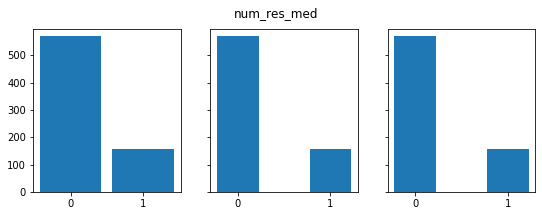

*****
factor_variety_attend


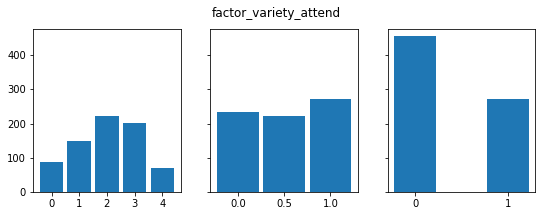

*****
ideal_unconference


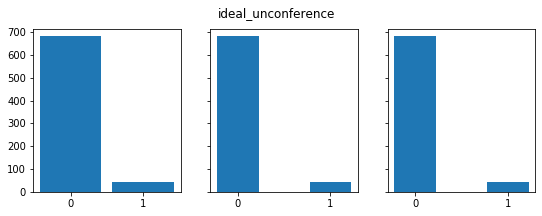

*****
learning_read


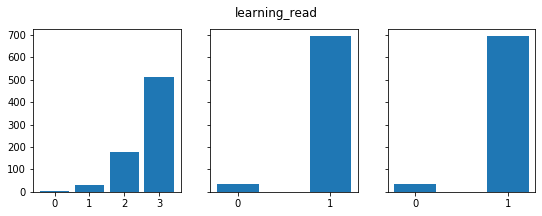

*****
factor_diverse_speak


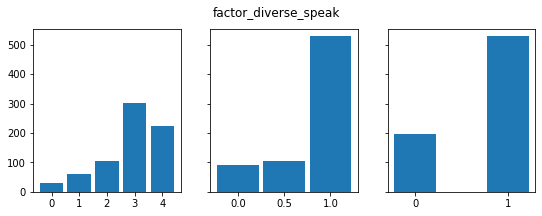

*****
learn_by_workshop


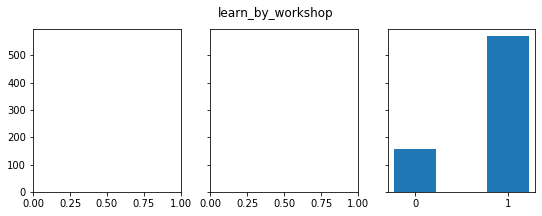

*****
session_social_event


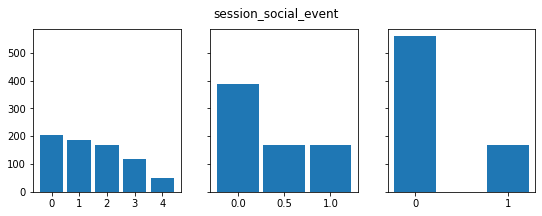

*****
exp_observe_res


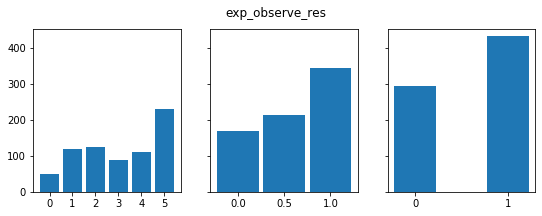

*****
likely_online_group


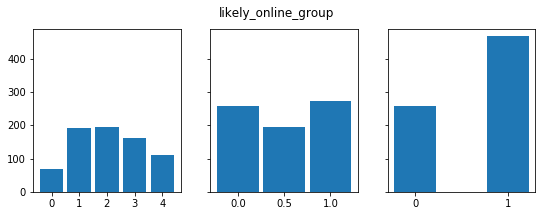

*****
likely_watch_video


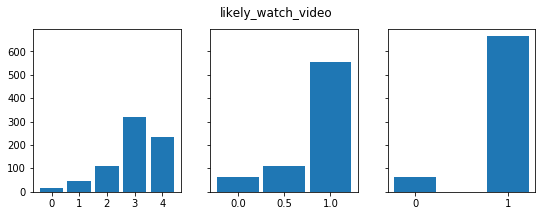

*****
learning_workshop


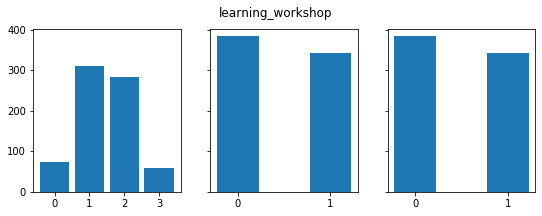

*****
learn_by_video


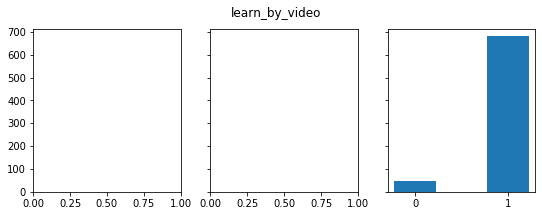

*****
company_med


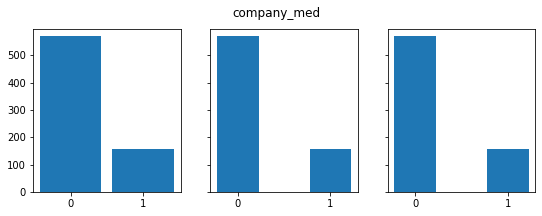

*****
factor_location


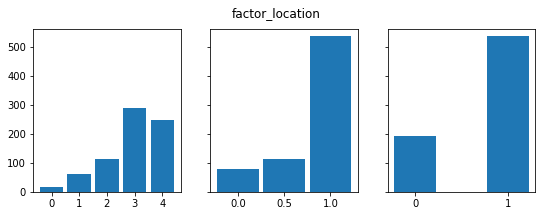

*****
job_advocate_res


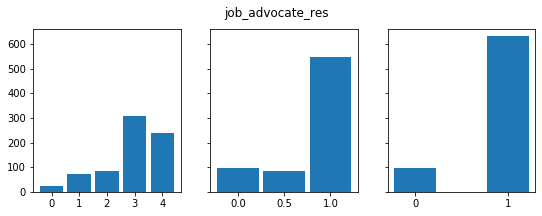

*****
exp_analyze_res


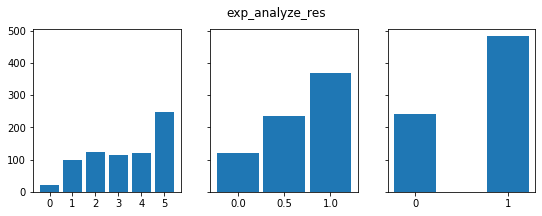

*****
session_long_talk


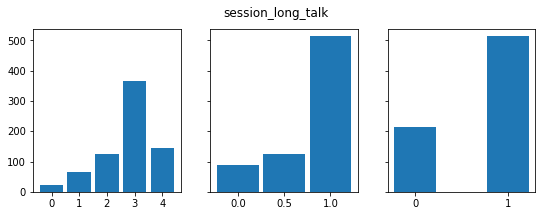

*****
ideal_conf_small


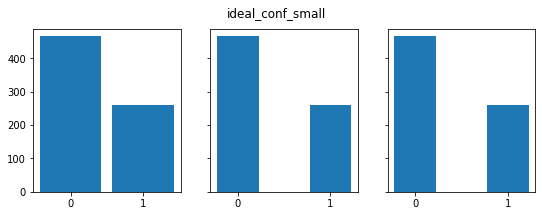

*****
job_taxo


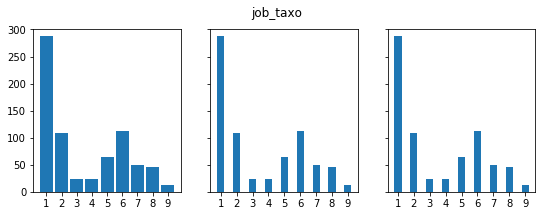

*****
company_large


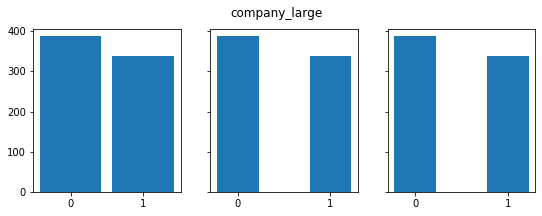

*****
job_observe_res


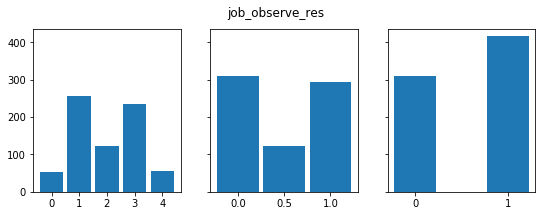

*****
learn_by_reading


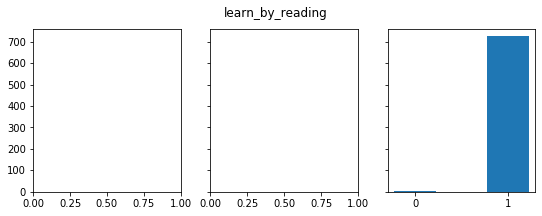

*****
learning_talks


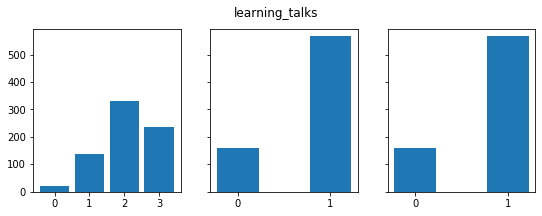

*****
num_res_large


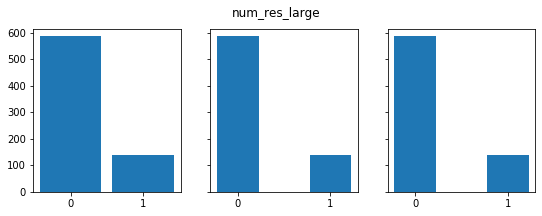

*****
exp_hire_res_vendor


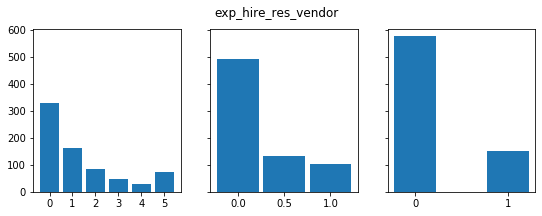

*****
learn_by_conference


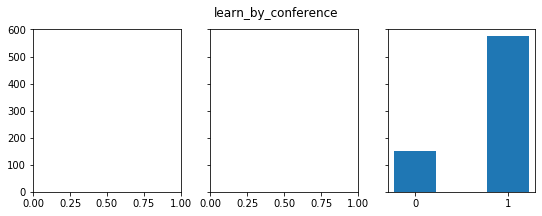

*****
learn_by_meetup


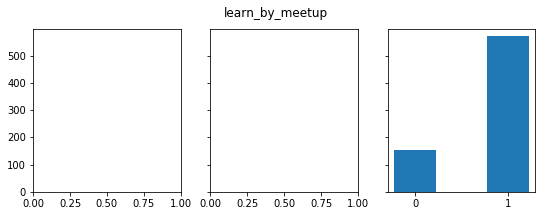

*****
factor_size


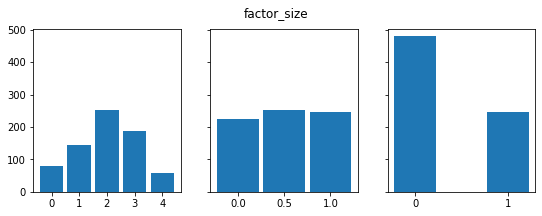

*****
session_keynote


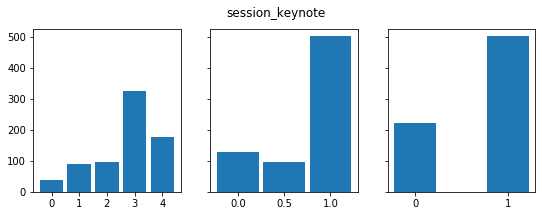

*****
num_res_small


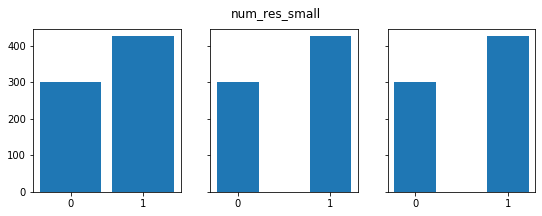

*****
likely_book


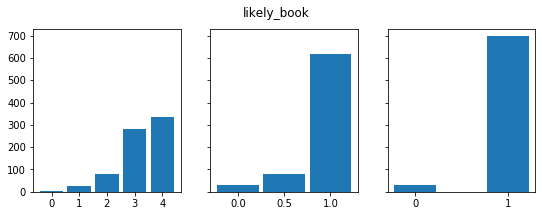

*****
job_teach_res


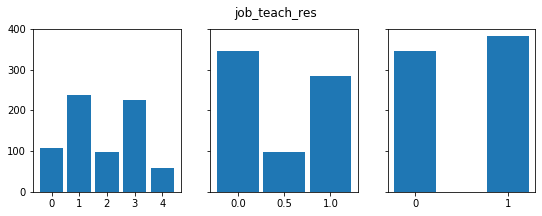

*****
likely_internet


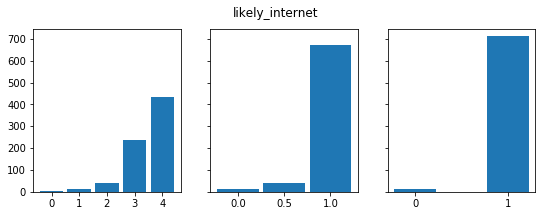

*****
exp_advocate_res


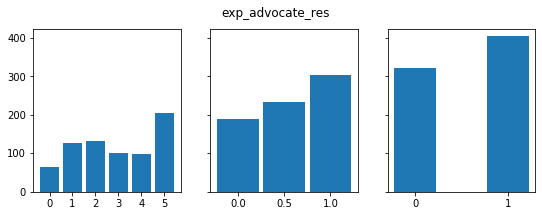

*****
likely_meetup


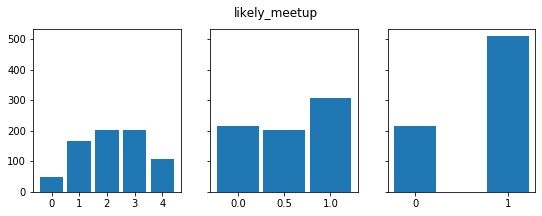

*****
factor_network


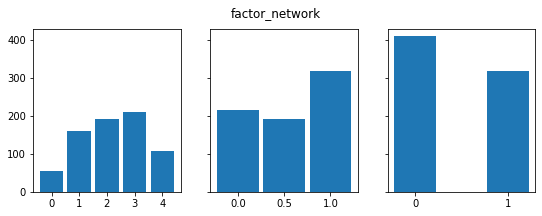

*****
session_short_talk


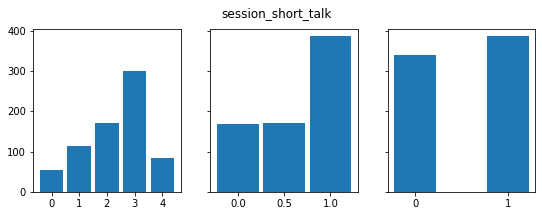

*****
likely_conference


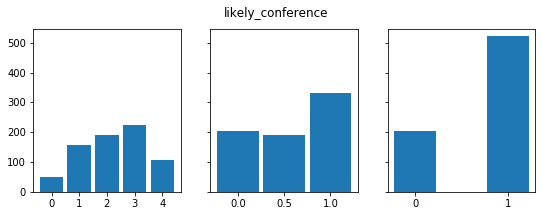

*****
likely_workshop


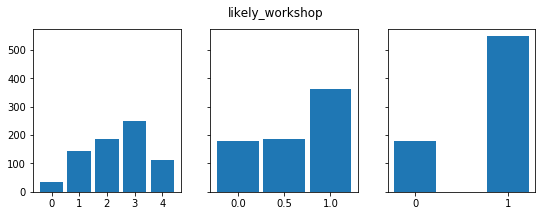

*****
target


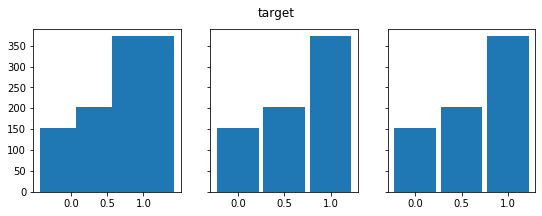

*****
session_qa


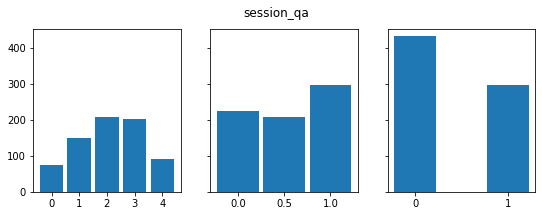

*****
job_hire_res_vendor


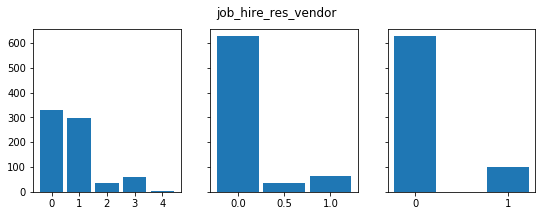

*****
exp_conduct_res


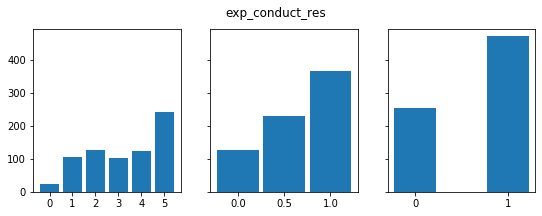

*****
exp_teach_res


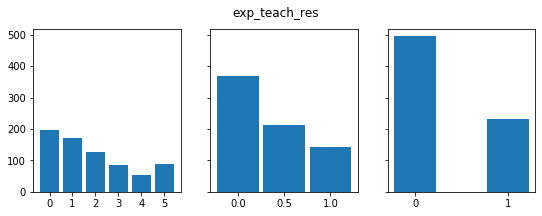

*****
learning_meetup


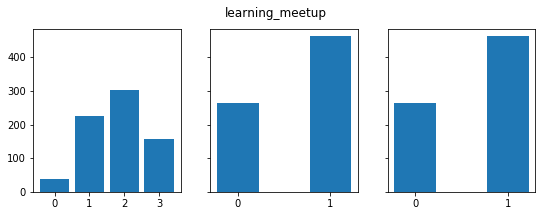

*****
persona_id


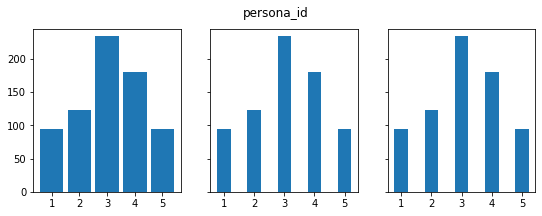

*****
sesson_topic_tables


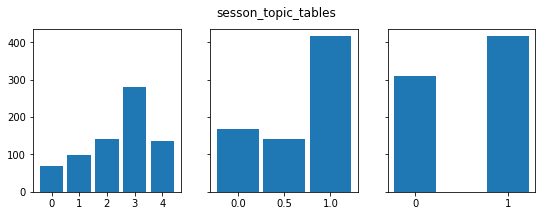

*****
exp_manage_res_proj


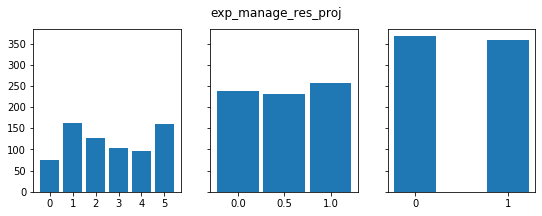

*****
ideal_multi_track


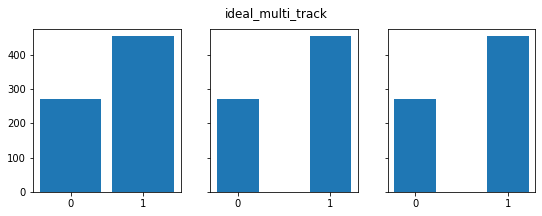

*****
job_conduct_res


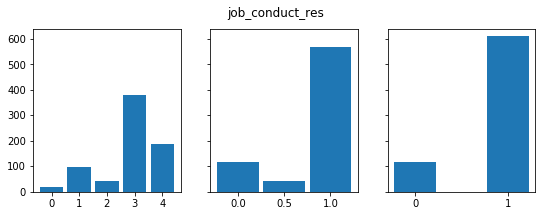

*****
company_small


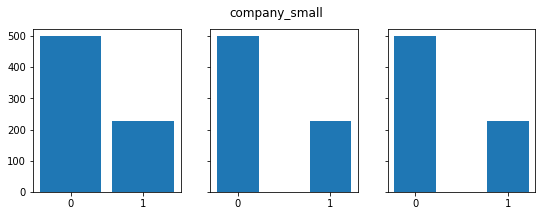

*****
learn_by_online_group


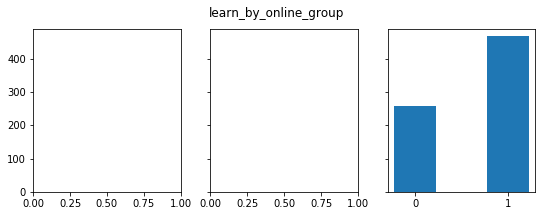

*****
ideal_conf_workshop


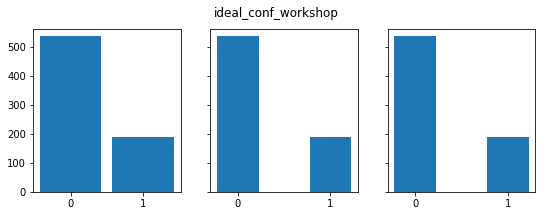

*****
factor_topics


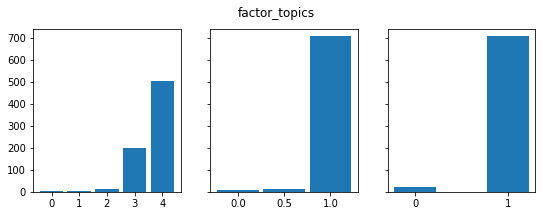

*****
session_network


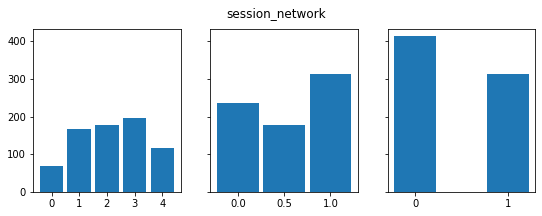

*****
research_educ_cat


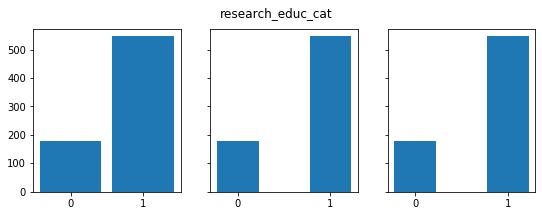

*****
exp_buy_res_report


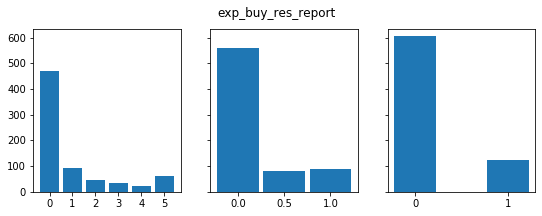

*****
factor_speaker


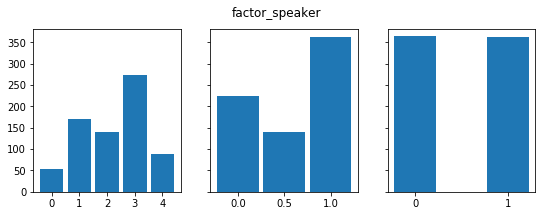

*****
job_lead_res_team


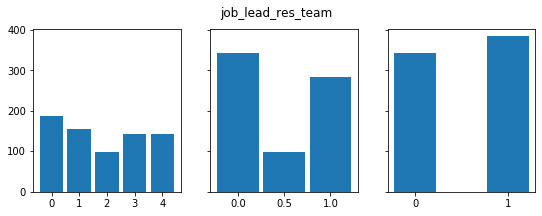

*****
factor_ability_to_pay


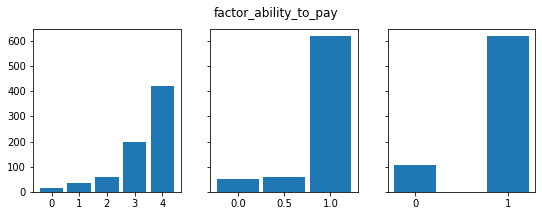

*****
ideal_conf_large


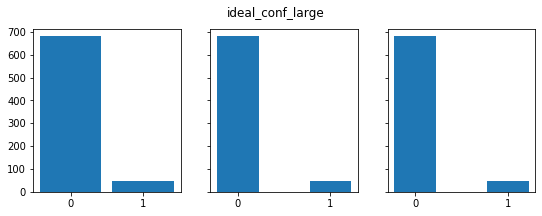

*****
job_plan_res


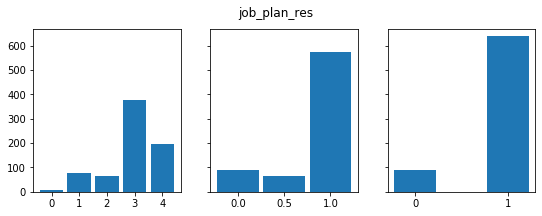

*****
session_workshop


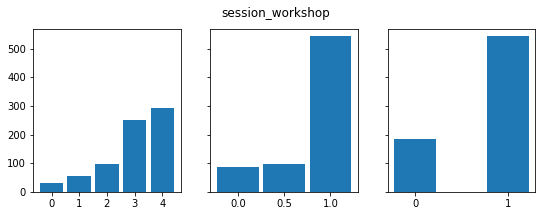

*****
exp_lead_res_team


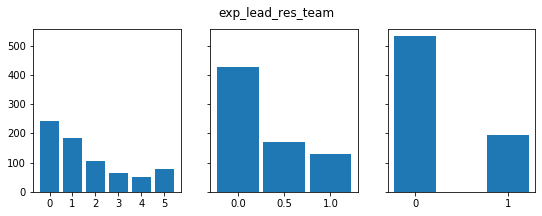

*****
ideal_structure_cat


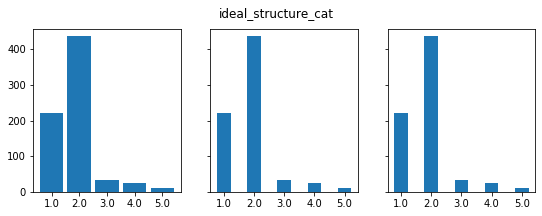

*****
factor_code


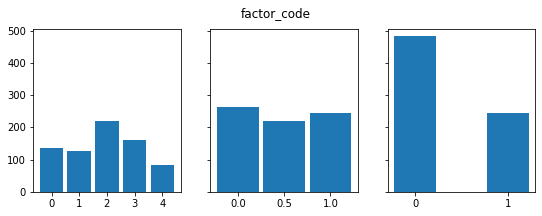

*****
learn_by_colleague


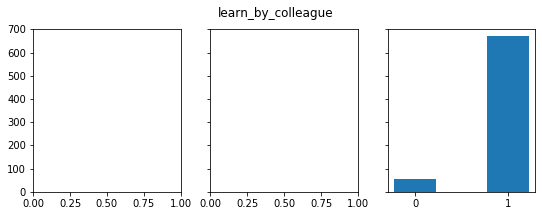

*****
factor_format_sessions


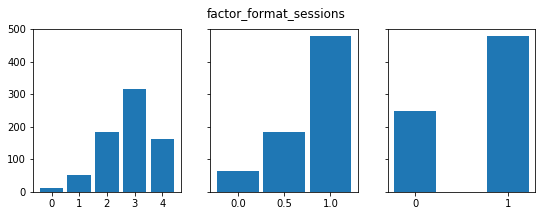

*****
job_analyze_res


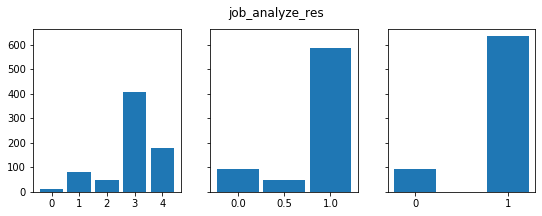

*****
learning_conference


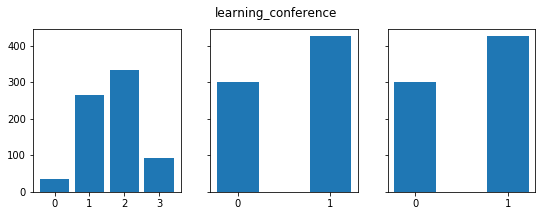

*****
job_manage_res_proj


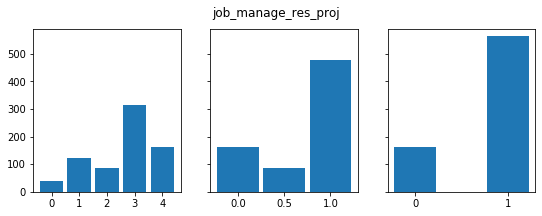

*****
job_buy_res_report


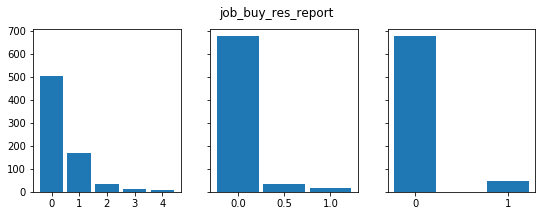

*****
likely_colleague


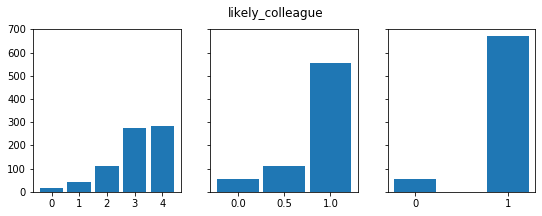

*****
exp_plan_res


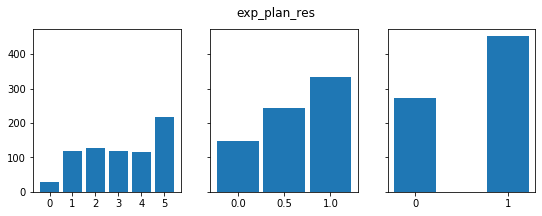

*****
ideal_conf_med


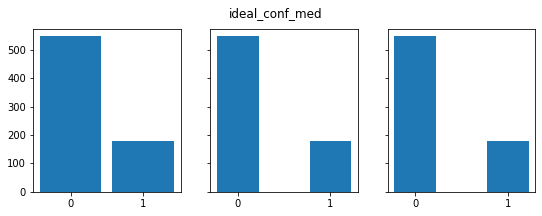

*****
ideal_conference_size_cat


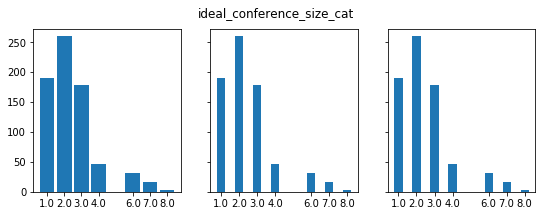

*****
ideal_single_track


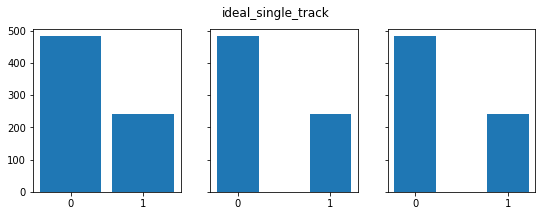

*****


In [42]:
countplot_tricols(df0=df, df1=dfrecode3, df2=dfrecode2, cols=chi2_cols)

num_res_med


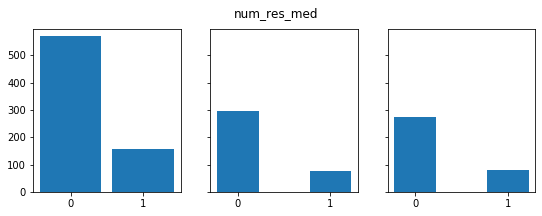

*****
factor_variety_attend


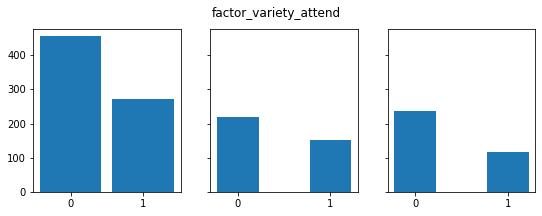

*****
ideal_unconference


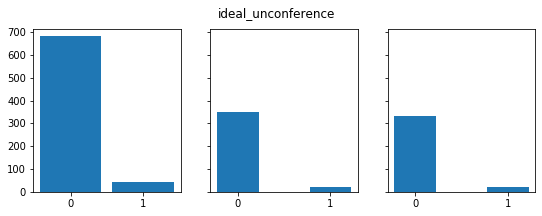

*****
learning_read


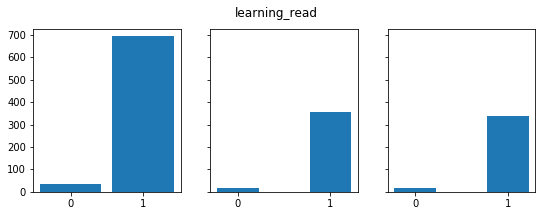

*****
factor_diverse_speak


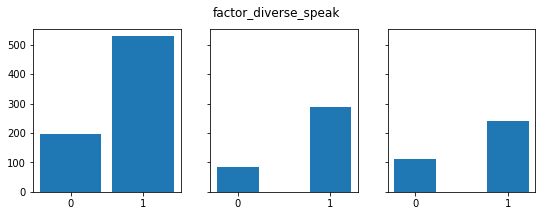

*****
learn_by_workshop


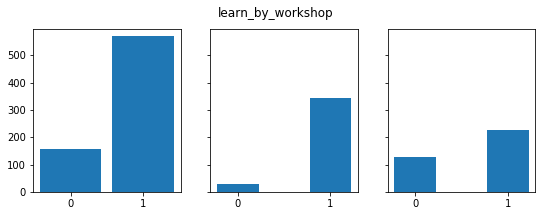

*****
session_social_event


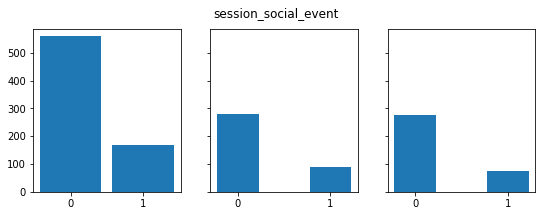

*****
exp_observe_res


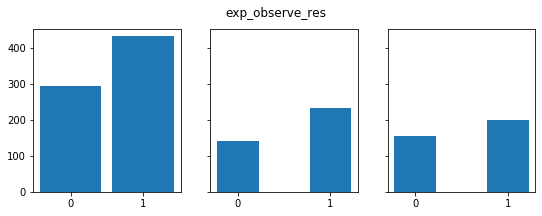

*****
likely_online_group


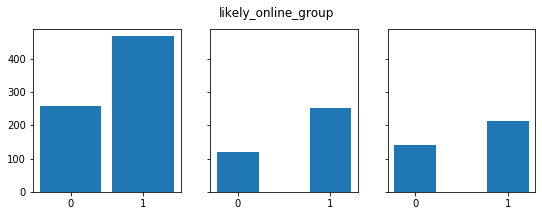

*****
likely_watch_video


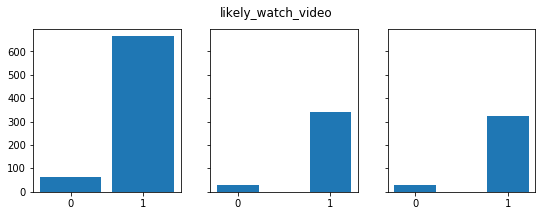

*****
learning_workshop


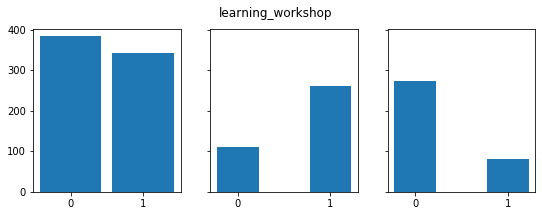

*****
learn_by_video


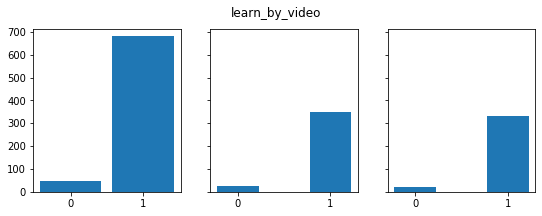

*****
company_med


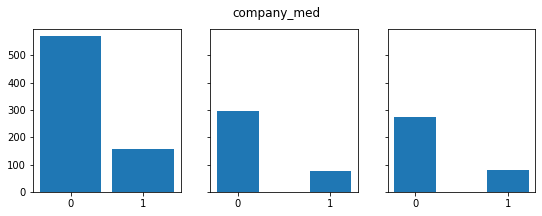

*****
factor_location


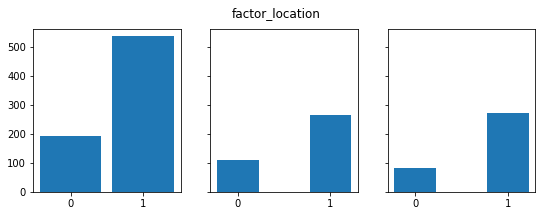

*****
job_advocate_res


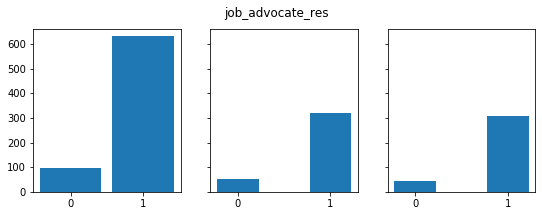

*****
exp_analyze_res


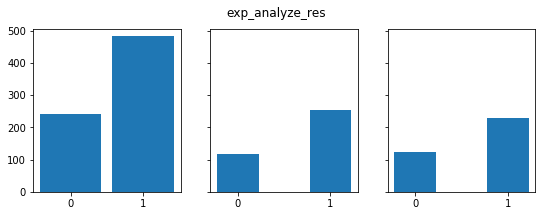

*****
session_long_talk


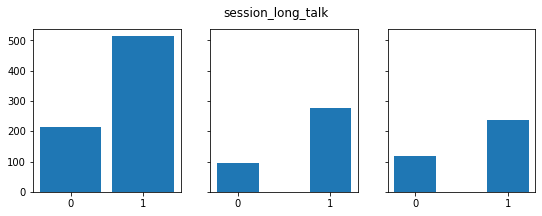

*****
ideal_conf_small


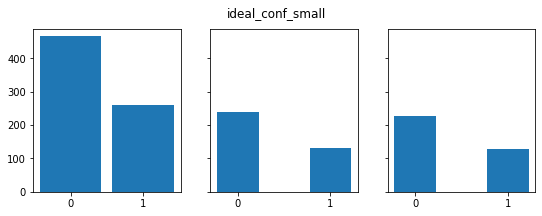

*****
job_taxo


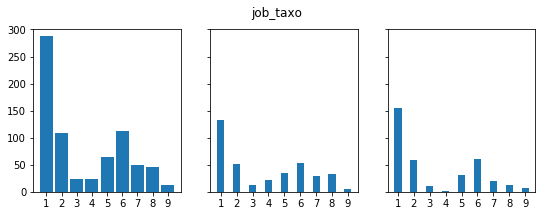

*****
company_large


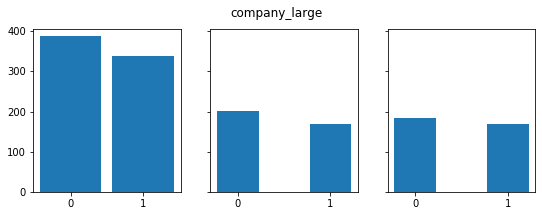

*****
job_observe_res


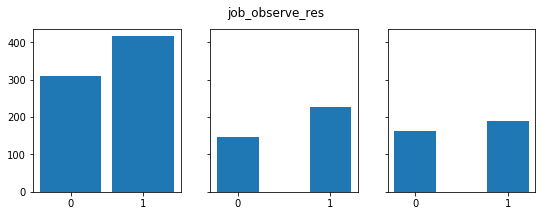

*****
learn_by_reading


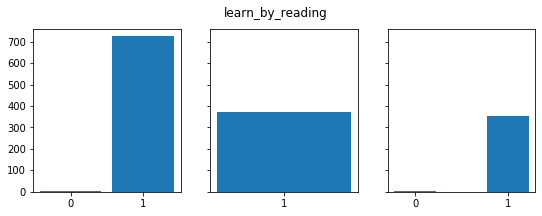

*****
learning_talks


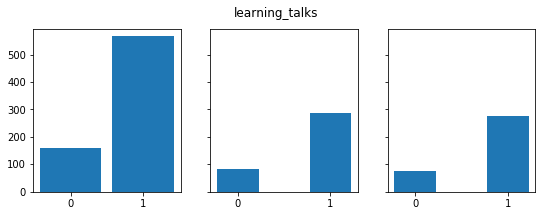

*****
num_res_large


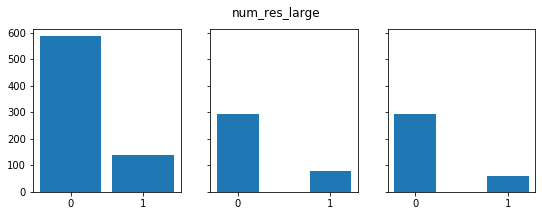

*****
exp_hire_res_vendor


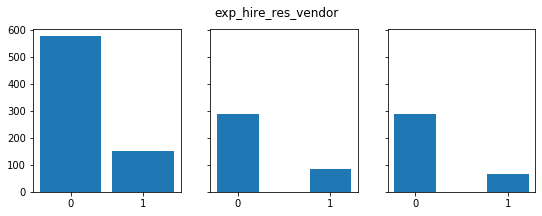

*****
learn_by_conference


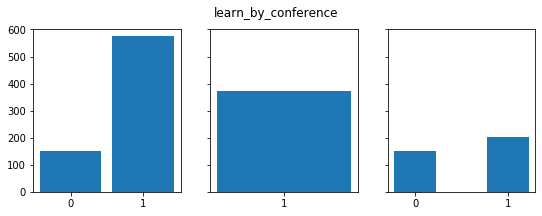

*****
learn_by_meetup


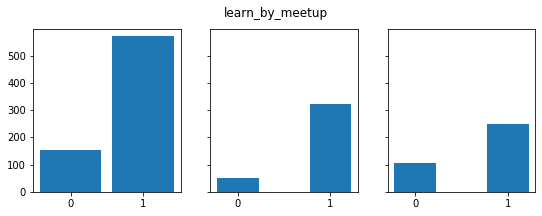

*****
factor_size


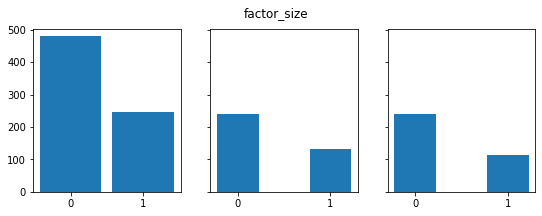

*****
session_keynote


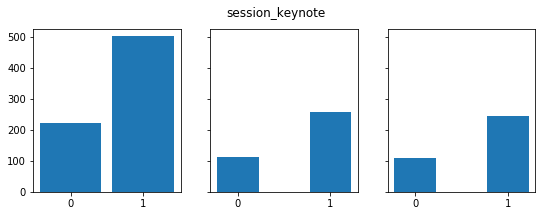

*****
num_res_small


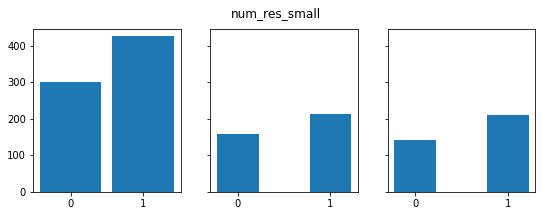

*****
likely_book


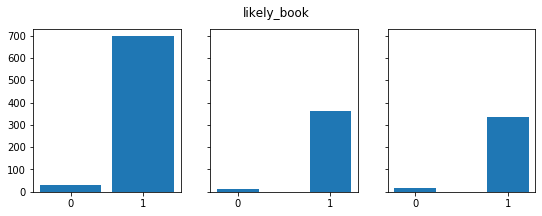

*****
job_teach_res


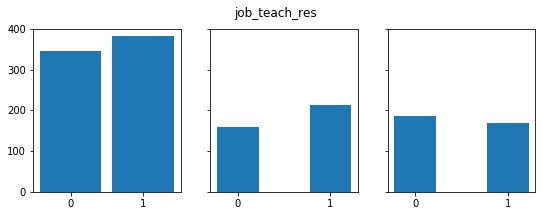

*****
likely_internet


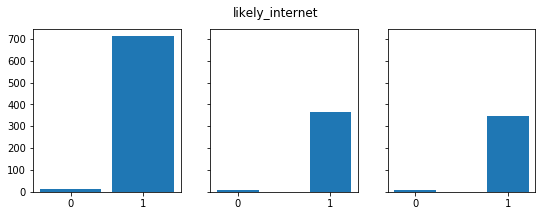

*****
exp_advocate_res


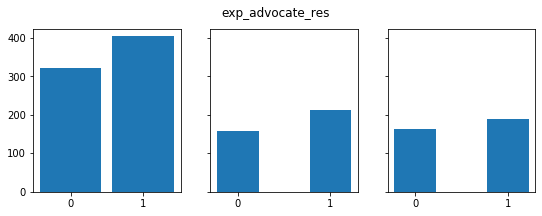

*****
likely_meetup


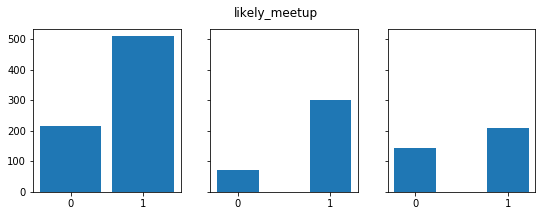

*****
factor_network


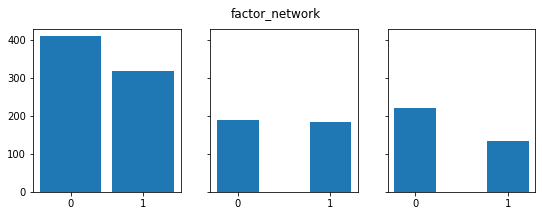

*****
session_short_talk


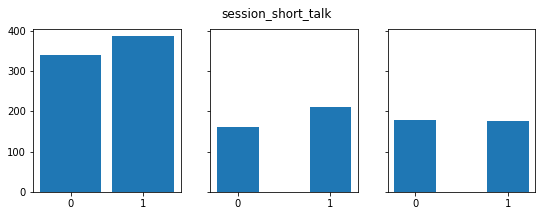

*****
likely_conference


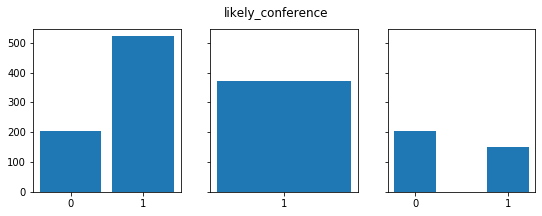

*****
likely_workshop


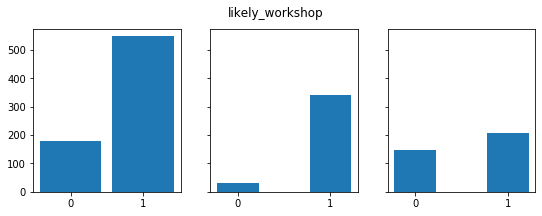

*****
target


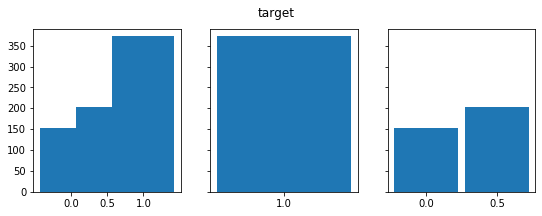

*****
session_qa


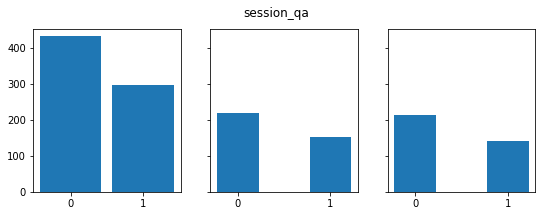

*****
job_hire_res_vendor


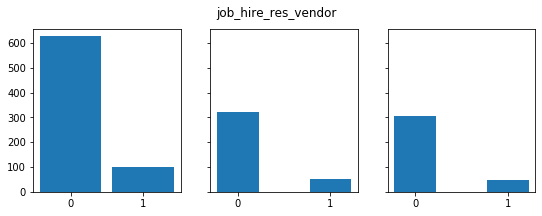

*****
exp_conduct_res


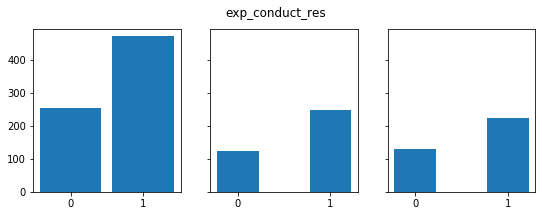

*****
exp_teach_res


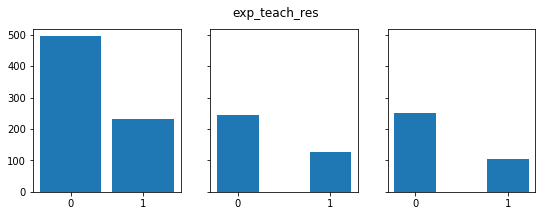

*****
learning_meetup


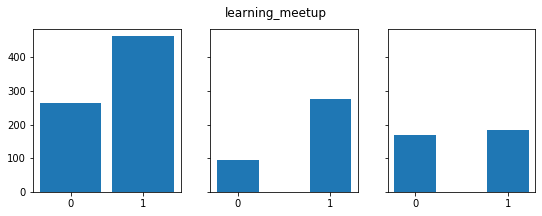

*****
persona_id


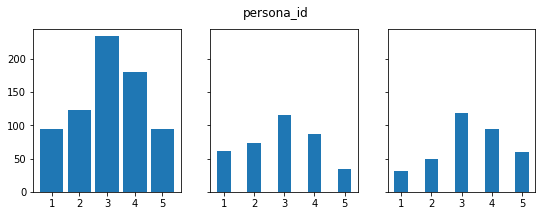

*****
sesson_topic_tables


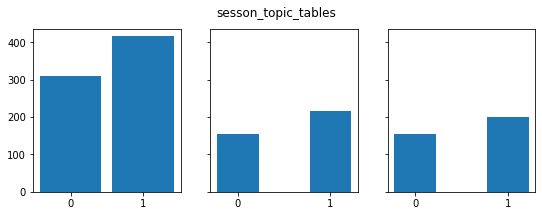

*****
exp_manage_res_proj


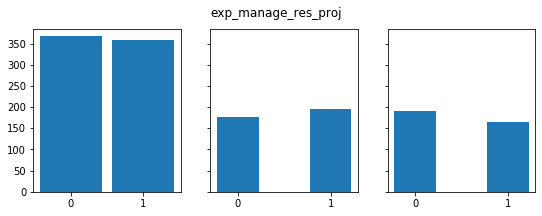

*****
ideal_multi_track


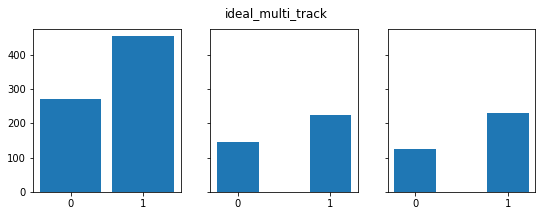

*****
job_conduct_res


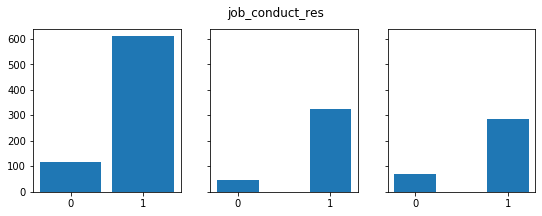

*****
company_small


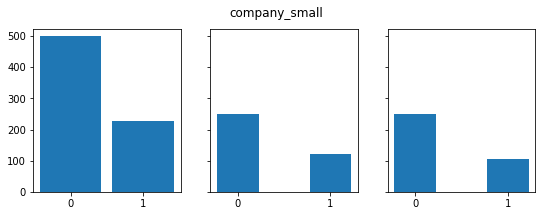

*****
learn_by_online_group


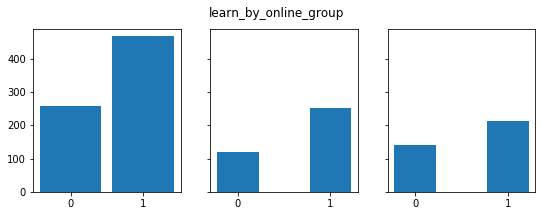

*****
ideal_conf_workshop


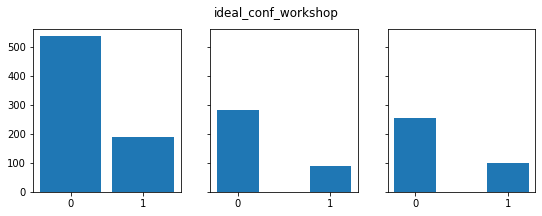

*****
factor_topics


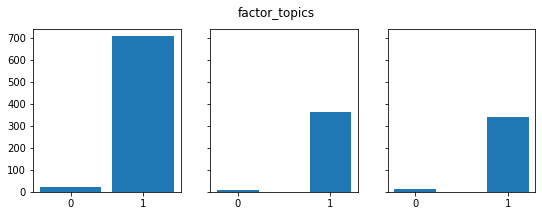

*****
session_network


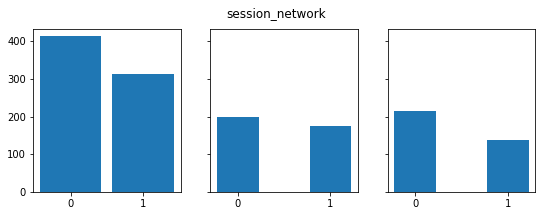

*****
research_educ_cat


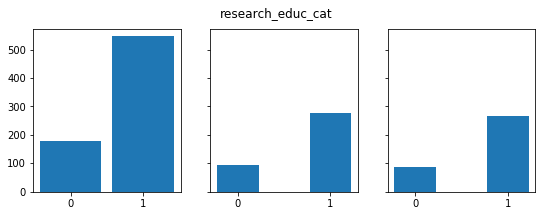

*****
exp_buy_res_report


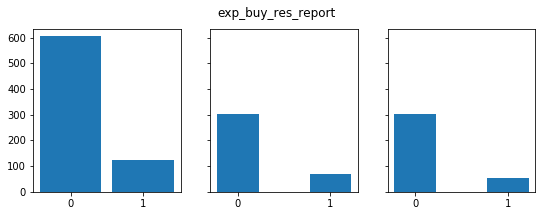

*****
factor_speaker


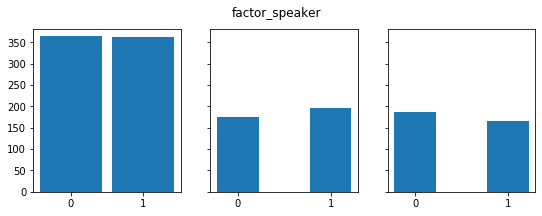

*****
job_lead_res_team


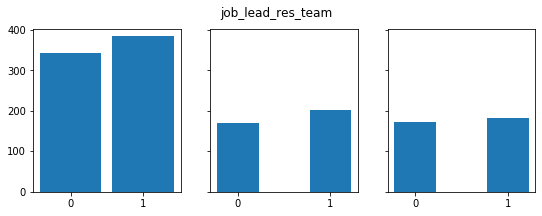

*****
factor_ability_to_pay


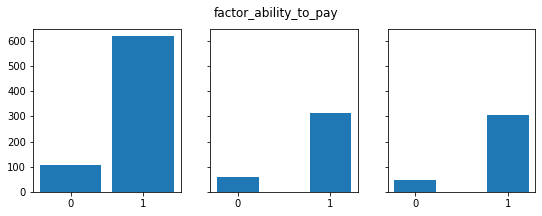

*****
ideal_conf_large


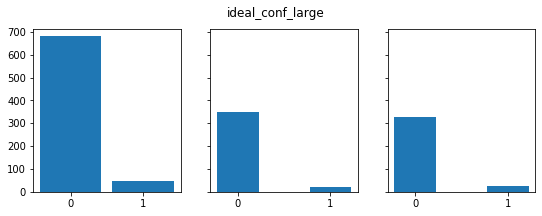

*****
job_plan_res


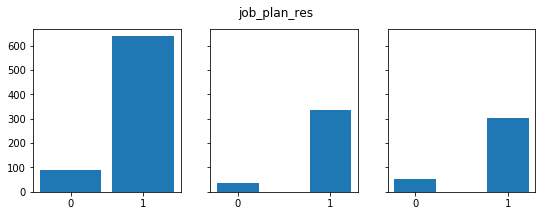

*****
session_workshop


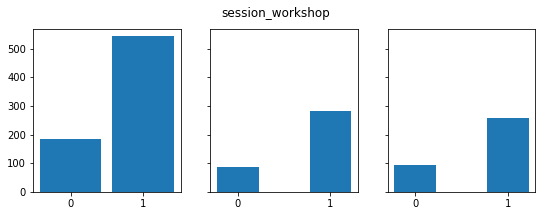

*****
exp_lead_res_team


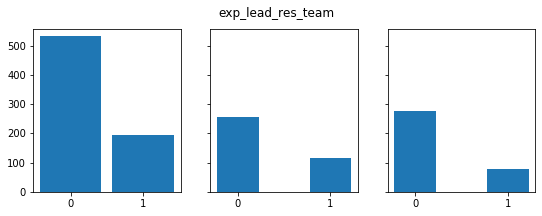

*****
ideal_structure_cat


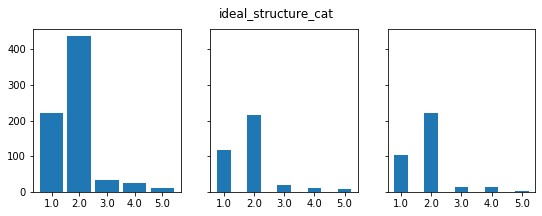

*****
factor_code


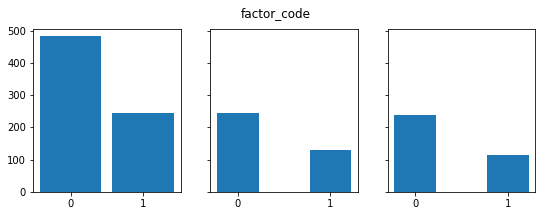

*****
learn_by_colleague


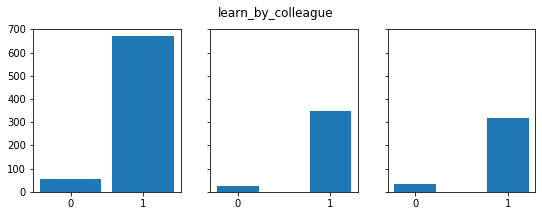

*****
factor_format_sessions


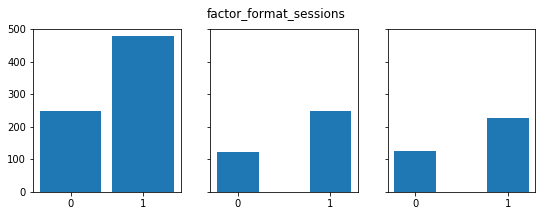

*****
job_analyze_res


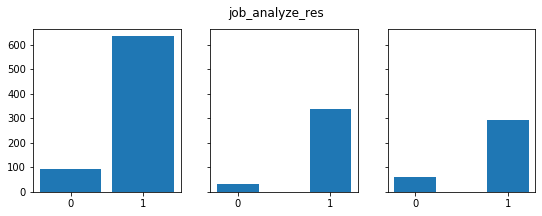

*****
learning_conference


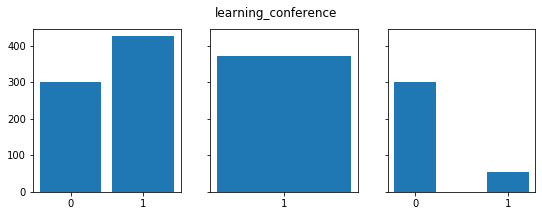

*****
job_manage_res_proj


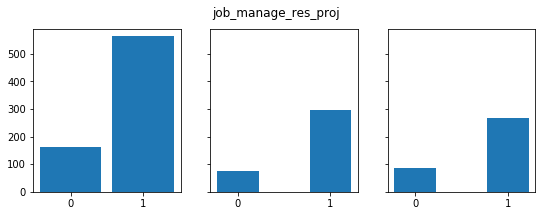

*****
job_buy_res_report


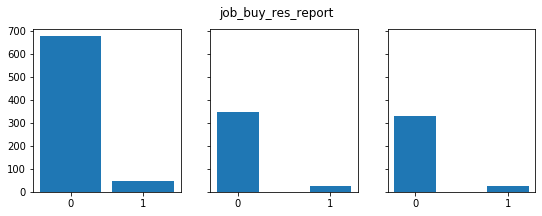

*****
likely_colleague


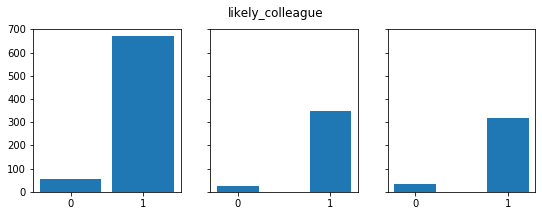

*****
exp_plan_res


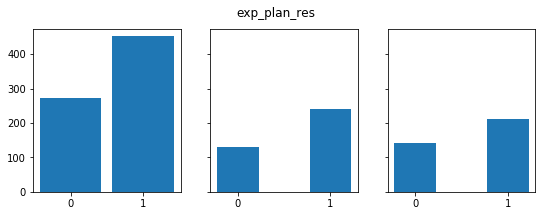

*****
ideal_conf_med


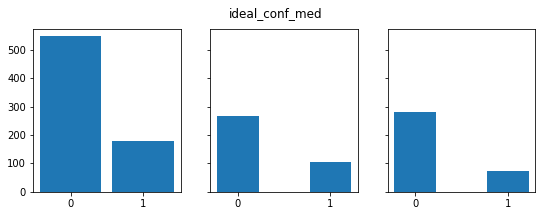

*****
ideal_conference_size_cat


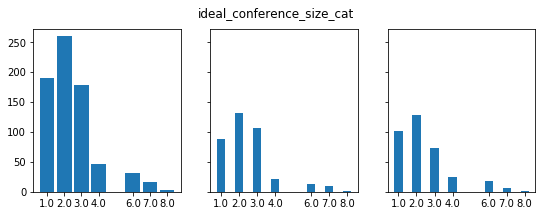

*****
ideal_single_track


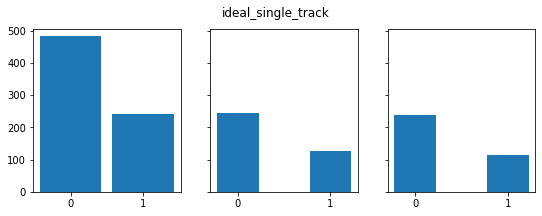

*****


In [43]:
countplot_tricols(df0=dfrecode2, df1=dfrecode2b1, df2=dfrecode2b0, cols=chi2_cols)

In [44]:
# def display_cats(col):

#     display(df[col].value_counts().sort_index())
#     display(dfrecode3[col].value_counts().sort_index())
#     display(dfrecode2[col].value_counts().sort_index())

## Chi2
[*Back to top*](#Contents)

In [45]:
# chk_df = dfrecode2
# chk_col = 'job_manage_res_proj'
# vs_col = 'target'

# observed = pd.crosstab(index=chk_df[chk_col], columns=chk_df[vs_col])
# observed

In [46]:
def get_chi2_results(
    chk_df, 
    chk_col, 
    vs_col, 
    display_obs=False,
    print_it=False, 
    return_all=False
):
    if print_it:
        print(f'chk_df  = {chk_df.shape}')
        print(f'chk_col = {chk_df[chk_col].name}')
        print(f'vs_col  = {chk_df[vs_col].name}')
    
    observed = pd.crosstab(index=chk_df[chk_col], columns=chk_df[vs_col])
    if display_obs: # Jupyter notebooks only #
        display(observed) # Jupyter notebooks only #
    chi2, p, degf, expected = stats.chi2_contingency(observed)    
    if print_it:
        print('Observed\n')
        print(observed.values)
        print('---\nExpected\n')
        print(expected)
        print('---\n')
        print(f'degf  = {degf:d}')
        print(f'chi^2 = {chi2:.4f}')
        print(f'p     = {p:.4f}')
    if return_all:
        return chi2, p, degf, expected, observed
    else:
        return p

In [47]:
# chk_df=dfrecode2
# chk_col='job_observe_res'
# vs_col='target'

# get_chi2_results(
#     chk_df=chk_df, 
#     chk_col=chk_col, 
#     vs_col=vs_col, 
#     display_obs=True,
#     print_it=True, 
#     return_all=False
# )


In [48]:
# chk_df = dfrecode3
# chk_col = 'job_observe_res'
# vs_col = 'target'

# get_chi2_results(
#     chk_df=chk_df, 
#     chk_col=chk_col, 
#     vs_col=vs_col, 
#     display_obs=True,
#     print_it=True, 
#     return_all=False
# )

In [49]:
def get_chi2_for_cols(df, cols, target=None, alpha=.05, print_detail=False, print_sum=False):
    chi2_df=pd.DataFrame(columns=['chk_col', 'vs_col', 'p_val'])
    hits, atts = 0, 0    
    chk_cols = [col for col in cols if col in df.columns]
    if target:
        iterlist = [(col, target) for col in chk_cols if col != target]
    else:
        iterlist = it.combinations(chk_cols, 2)
    for chk_col, vs_col in iterlist:
        atts += 1
        pval = get_chi2_results(
            chk_df=df, 
            chk_col=chk_col,
            vs_col=vs_col, 
            display_obs=False,
            print_it=print_detail, 
            return_all=False
        )
        if pval < alpha:
            hits +=1
            if print_detail:
                print(f'Hit {hits} of {atts}:')
                print(f'columns = {chk_col} : {vs_col}')
                print(f'pval    = {pval:.5f}\n')
        chi2_df = chi2_df.append({
            'chk_col': chk_col, 
            'vs_col': vs_col, 
            'p_val': pval}
        , ignore_index=True)
        chi2_df.index.name='index'
    if print_sum:
        print(f'Found {hits} hits out of {atts} columns checked.')
    return chi2_df

In [50]:
chi2_2df = explore.get_chi2_for_cols(dfrecode2, chi2_cols, 'target', print_sum=True)

Found 26 hits out of 76 columns checked.


In [51]:
chi2_2df[chi2_2df.p_val<=5e-02]

,chk_col,vs_col,p_val
index,,,
4,factor_diverse_speak,target,7.616937e-03
5,learn_by_workshop,target,5.383381e-34
8,likely_online_group,target,4.377515e-02
10,learning_workshop,target,2.042493e-37
18,job_taxo,target,1.455262e-04
22,learning_talks,target,4.932926e-02
25,learn_by_conference,target,2.244415e-158
26,learn_by_meetup,target,2.025150e-13
28,session_keynote,target,8.185908e-04


In [52]:
chi2_3df = explore.get_chi2_for_cols(dfrecode3, chi2_cols, 'target', print_sum=True)

Found 19 hits out of 69 columns checked.


In [53]:
# chi2_3df[chi2_3df.p_val<=.05]

In [54]:
chi2_2dfall = explore.get_chi2_for_cols(dfrecode2, chi2_cols, print_sum=True)

Found 787 hits out of 2926 columns checked.


In [55]:
chi2_2dfall[chi2_2dfall.p_val<=.05]

,chk_col,vs_col,p_val
index,,,
0,num_res_med,factor_variety_attend,4.873608e-03
5,num_res_med,session_social_event,1.285084e-02
9,num_res_med,learning_workshop,3.501577e-02
17,num_res_med,job_taxo,7.934538e-03
18,num_res_med,company_large,5.174060e-12
...,...,...,...
2907,job_manage_res_proj,exp_plan_res,2.458789e-04
2922,exp_plan_res,ideal_single_track,3.207792e-02
2923,ideal_conf_med,ideal_conference_size_cat,1.486891e-153


In [56]:
chi2_2dfb = get_chi2_for_cols(dfrecode2, chi2_cols, 'targetb', print_detail=True, print_sum=True)

chk_df  = (726, 96)
chk_col = num_res_med
vs_col  = targetb
Observed

[[274 295]
 [ 80  77]]
---
Expected

[[277.44628099 291.55371901]
 [ 76.55371901  80.44628099]]
---

degf  = 1
chi^2 = 0.2824
p     = 0.5952
chk_df  = (726, 96)
chk_col = factor_variety_attend
vs_col  = targetb
Observed

[[236 219]
 [118 153]]
---
Expected

[[221.85950413 233.14049587]
 [132.14049587 138.85950413]]
---

degf  = 1
chi^2 = 4.3847
p     = 0.0363
Hit 1 of 2:
columns = factor_variety_attend : targetb
pval    = 0.03626

chk_df  = (726, 96)
chk_col = ideal_unconference
vs_col  = targetb
Observed

[[332 349]
 [ 22  23]]
---
Expected

[[332.05785124 348.94214876]
 [ 21.94214876  23.05785124]]
---

degf  = 1
chi^2 = 0.0185
p     = 0.8917
chk_df  = (726, 96)
chk_col = learning_read
vs_col  = targetb
Observed

[[ 17  16]
 [337 356]]
---
Expected

[[ 16.09090909  16.90909091]
 [337.90909091 355.09090909]]
---

degf  = 1
chi^2 = 0.0213
p     = 0.8841
chk_df  = (726, 96)
chk_col = factor_diverse_speak
vs_col  = tar


[[178 162]
 [176 210]]
---
Expected

[[165.78512397 174.21487603]
 [188.21487603 197.78512397]]
---

degf  = 1
chi^2 = 3.0386
p     = 0.0813
chk_df  = (726, 96)
chk_col = likely_conference
vs_col  = targetb
Observed

[[205   0]
 [149 372]]
---
Expected

[[ 99.95867769 105.04132231]
 [254.04132231 266.95867769]]
---

degf  = 1
chi^2 = 297.3364
p     = 0.0000
Hit 13 of 38:
columns = likely_conference : targetb
pval    = 0.00000

chk_df  = (726, 96)
chk_col = likely_workshop
vs_col  = targetb
Observed

[[147  31]
 [207 341]]
---
Expected

[[ 86.79338843  91.20661157]
 [267.20661157 280.79338843]]
---

degf  = 1
chi^2 = 106.1959
p     = 0.0000
Hit 14 of 39:
columns = likely_workshop : targetb
pval    = 0.00000

chk_df  = (726, 96)
chk_col = target
vs_col  = targetb
Observed

[[152   0]
 [202   0]
 [  0 372]]
---
Expected

[[ 74.11570248  77.88429752]
 [ 98.49586777 103.50413223]
 [181.38842975 190.61157025]]
---

degf  = 2
chi^2 = 726.0000
p     = 0.0000
Hit 15 of 40:
columns = target : t


[[143 131]
 [211 241]]
---
Expected

[[133.60330579 140.39669421]
 [220.39669421 231.60330579]]
---

degf  = 1
chi^2 = 1.8571
p     = 0.1730
chk_df  = (726, 96)
chk_col = ideal_conf_med
vs_col  = targetb
Observed

[[281 266]
 [ 73 106]]
---
Expected

[[266.71900826 280.28099174]
 [ 87.28099174  91.71900826]]
---

degf  = 1
chi^2 = 5.6362
p     = 0.0176
Hit 24 of 75:
columns = ideal_conf_med : targetb
pval    = 0.01759

chk_df  = (726, 96)
chk_col = ideal_conference_size_cat
vs_col  = targetb
Observed

[[101  89]
 [128 132]
 [ 73 106]
 [ 25  21]
 [ 18  13]
 [  7  10]
 [  2   1]]
---
Expected

[[ 92.6446281   97.3553719 ]
 [126.7768595  133.2231405 ]
 [ 87.28099174  91.71900826]
 [ 22.42975207  23.57024793]
 [ 15.11570248  15.88429752]
 [  8.2892562    8.7107438 ]
 [  1.46280992   1.53719008]]
---

degf  = 6
chi^2 = 8.4792
p     = 0.2051
chk_df  = (726, 96)
chk_col = ideal_single_track
vs_col  = targetb
Observed

[[239 244]
 [115 128]]
---
Expected

[[235.51239669 247.48760331]
 [118.48

In [57]:
chi2_2dfb[chi2_2dfb.p_val<=5e-02]

,chk_col,vs_col,p_val
index,,,
1,factor_variety_attend,targetb,3.626214e-02
4,factor_diverse_speak,targetb,6.040945e-03
5,learn_by_workshop,targetb,7.341637e-21
8,likely_online_group,targetb,4.059659e-02
10,learning_workshop,targetb,3.003497e-37
16,session_long_talk,targetb,3.927160e-02
18,job_taxo,targetb,2.110578e-04
25,learn_by_conference,targetb,2.766155e-45
26,learn_by_meetup,targetb,1.601858e-07


In [58]:
# def get_chi2_for_dfs(df1, df2, cols, alpha=.05, print_detail=False, print_sum=False):
#     chi2_df=pd.DataFrame(columns=['chk_df', 'vs_df', 'col', 'p_val'])
#     hits, atts = 0, 0    
#     chk_cols = [col for col in cols if col in df1.columns]
#     chk_cols = [col for col in cols if col in df2.columns]
#     print(chk_cols)
#     for chk_col in chk_cols:
#         atts += 1
#         chk_df = df1[[chk_col.value_counts()]].join(df2[[chk_col.value_counts()]], how='outer', lsuffix='_1', rsuffix='_2')
#         pval = get_chi2_results(
#             chk_df=df, 
#             chk_col=chk_col,
#             vs_col=chk_col, 
#             display_obs=False,
#             print_it=False, 
#             return_all=False
#         )
#         observed = pd.crosstab(index=chk_df[chk_col], columns=chk_df[vs_col])
#         display(observed) # Jupyter notebooks only #
#         chi2, p, degf, expected = stats.chi2_contingency(observed)    
#         if print_it:
#             print('Observed\n')
#             print(observed.values)
#             print('---\nExpected\n')
#             print(expected)
#             print('---\n')
#             print(f'degf  = {degf:d}')
#             print(f'chi^2 = {chi2:.4f}')
#             print(f'p     = {p:.4f}')
#         if return_all:
#             return chi2, p, degf, expected, observed
#         else:
#             return p
#         if pval < alpha:
#             hits +=1
#             if print_detail:
#                 print(chk_df.head(10))
#                 print(f'Hit {hits} of {atts}:')
#                 print(f'column  = {chk_col}')
#                 print(f'pval    = {pval:.5f}\n')
#         chi2_df = chi2_df.append({
#             'chk_df': df1, 
#             'vs_df': df2,
#             'col': chk_col,
#             'p_val': pval}
#         , ignore_index=True)
#         chi2_df.index.name='index'
#     if print_sum:
#         print(f'Found {hits} hits out of {atts} columns checked.')
#     return chi2_df

In [59]:
# chi2_2bvals = get_chi2_for_dfs(
#     df1=dfrecode2b1, 
#     df2=dfrecode2b0, 
#     cols=chi2_cols, 
#     alpha=.05, print_detail=True, print_sum=True)

In [60]:
# chi2_2bvals

In [61]:
chi2_2df.to_csv('chi2_2df.txt')
chi2_3df.to_csv('chi2_3df.txt')
chi2_2dfall.to_csv('chi2_2dfall.txt')

In [62]:
low_p_qs = [
'job_taxo',
'job_conduct_res',
'job_analyze_res',
'job_teach_res',
'exp_lead_res_team',
'persona_id'
]


chk_df=dfrecode2
vs_col='target'

for q in low_p_qs:
    get_chi2_results(
        chk_df=chk_df, 
        chk_col=q, 
        vs_col=vs_col, 
        display_obs=True,
        print_it=True, 
        return_all=False
    )
    print('#####')


chk_df  = (726, 96)
chk_col = job_taxo
vs_col  = target


target,0.0,0.5,1.0
job_taxo,,,
1,76,78,133
2,22,36,51
3,4,6,13
4,1,1,21
5,8,23,34
6,19,41,53
7,9,11,29
8,8,4,33
9,5,2,5


Observed

[[ 76  78 133]
 [ 22  36  51]
 [  4   6  13]
 [  1   1  21]
 [  8  23  34]
 [ 19  41  53]
 [  9  11  29]
 [  8   4  33]
 [  5   2   5]]
---
Expected

[[ 60.08815427  79.85399449 147.05785124]
 [ 22.82093664  30.32782369  55.85123967]
 [  4.815427     6.39944904  11.78512397]
 [  4.815427     6.39944904  11.78512397]
 [ 13.60881543  18.08539945  33.30578512]
 [ 23.6584022   31.44077135  57.90082645]
 [ 10.25895317  13.63360882  25.10743802]
 [  9.4214876   12.52066116  23.05785124]
 [  2.51239669   3.33884298   6.14876033]]
---

degf  = 16
chi^2 = 44.8657
p     = 0.0001
#####
chk_df  = (726, 96)
chk_col = job_conduct_res
vs_col  = target


target,0.0,0.5,1.0
job_conduct_res,,,
0,27,43,46
1,125,159,326


Observed

[[ 27  43  46]
 [125 159 326]]
---
Expected

[[ 24.28650138  32.27548209  59.43801653]
 [127.71349862 169.72451791 312.56198347]]
---

degf  = 2
chi^2 = 8.2179
p     = 0.0164
#####
chk_df  = (726, 96)
chk_col = job_analyze_res
vs_col  = target


target,0.0,0.5,1.0
job_analyze_res,,,
0,23,36,33
1,129,166,339


Observed

[[ 23  36  33]
 [129 166 339]]
---
Expected

[[ 19.26170799  25.59779614  47.14049587]
 [132.73829201 176.40220386 324.85950413]]
---

degf  = 2
chi^2 = 10.5285
p     = 0.0052
#####
chk_df  = (726, 96)
chk_col = job_teach_res
vs_col  = target


target,0.0,0.5,1.0
job_teach_res,,,
0,82,104,159
1,70,98,213


Observed

[[ 82 104 159]
 [ 70  98 213]]
---
Expected

[[ 72.23140496  95.99173554 176.7768595 ]
 [ 79.76859504 106.00826446 195.2231405 ]]
---

degf  = 2
chi^2 = 7.1969
p     = 0.0274
#####
chk_df  = (726, 96)
chk_col = exp_lead_res_team
vs_col  = target


target,0.0,0.5,1.0
exp_lead_res_team,,,
0,125,152,255
1,27,50,117


Observed

[[125 152 255]
 [ 27  50 117]]
---
Expected

[[111.38292011 148.02203857 272.59504132]
 [ 40.61707989  53.97796143  99.40495868]]
---

degf  = 2
chi^2 = 10.8801
p     = 0.0043
#####
chk_df  = (726, 96)
chk_col = persona_id
vs_col  = target


target,0.0,0.5,1.0
persona_id,,,
1,17,15,62
2,18,32,73
3,52,66,116
4,40,54,87
5,25,35,34


Observed

[[ 17  15  62]
 [ 18  32  73]
 [ 52  66 116]
 [ 40  54  87]
 [ 25  35  34]]
---
Expected

[[ 19.68044077  26.15426997  48.16528926]
 [ 25.75206612  34.2231405   63.02479339]
 [ 48.99173554  65.10743802 119.90082645]
 [ 37.8953168   50.36088154  92.74380165]
 [ 19.68044077  26.15426997  48.16528926]]
---

degf  = 8
chi^2 = 22.8078
p     = 0.0036
#####


In [63]:
idx = pd.IndexSlice

persona_counts = (pd.DataFrame(df
                               .groupby(by=['persona_id'])
                               .target
                               .agg('count')
                              )
                  .rename(columns={'target': 'count'})
                 )

job_group_by = ['persona_id', 'job_title']
job_counts = (pd.DataFrame(df
                           .groupby(by=job_group_by)
                           .target
                           .agg('count')
                          )
              .reset_index()
              .rename(columns={'target': 'count'})
              .sort_values(by=['persona_id','count'], ascending=[True,False]))

job_counts = job_counts.merge(
    persona_counts.rename(columns={'count':'total'}), 
    how='left', left_on='persona_id', right_on='persona_id')
job_counts['pid_pct'] = np.array(job_counts['count'])/np.array(job_counts['total'])
job_counts = job_counts.drop(columns='total')
job_counts = job_counts.set_index(['persona_id', 'job_title'])

for p in persona_counts.index:
    jc = job_counts.loc[idx[[p],:]].head(3).copy()
    display(jc)

count   pid_pct
persona_id job_title                  
1          Consultant     49  0.521277
           Executive      45  0.478723

count   pid_pct
persona_id job_title                  
2          Strategist     21  0.170732
           Academic       20  0.162602
           Engineer       13  0.105691

count   pid_pct
persona_id job_title                            
3          Senior UX Researcher     53  0.226496
           UX Researcher            50  0.213675
           Research Manager         49  0.209402

count   pid_pct
persona_id job_title                            
4          UX Researcher            73  0.403315
           Senior UX Researcher     26  0.143646
           UX Designer              23  0.127072

count   pid_pct
persona_id job_title                          
5          UX Researcher          44  0.468085
           UX Designer            34  0.361702
           Senior UX Designer      4  0.042553

,persona_id,job_title,count,pid_pct
1,1,Executive,45,0.478723
0,1,Consultant,49,0.521277


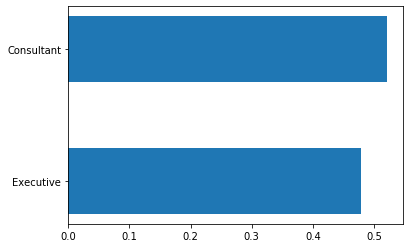

,persona_id,job_title,count,pid_pct
2,2,Engineer,13,0.105691
1,2,Academic,20,0.162602
0,2,Strategist,21,0.170732


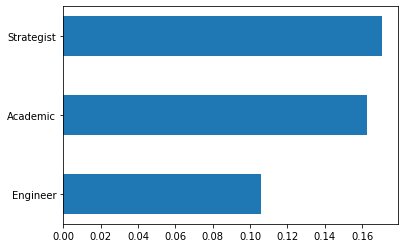

,persona_id,job_title,count,pid_pct
2,3,Research Manager,49,0.209402
1,3,UX Researcher,50,0.213675
0,3,Senior UX Researcher,53,0.226496


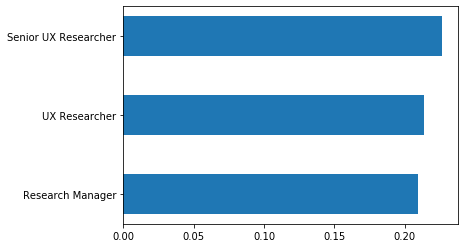

,persona_id,job_title,count,pid_pct
2,4,UX Designer,23,0.127072
1,4,Senior UX Researcher,26,0.143646
0,4,UX Researcher,73,0.403315


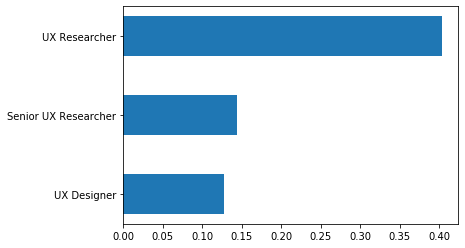

,persona_id,job_title,count,pid_pct
2,5,Senior UX Designer,4,0.042553
1,5,UX Designer,34,0.361702
0,5,UX Researcher,44,0.468085


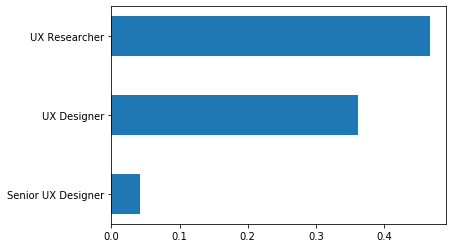

In [64]:
for p in persona_counts.index:
    jc = job_counts.loc[idx[[p],:]].head(3).copy()
    jc=jc.reset_index().sort_values(by='pid_pct')
    display(jc)
    
    fig, ax1 = plt.subplots(figsize=(6, 4))
    ax1.barh(jc.job_title, width=jc.pid_pct, height=.5, tick_label = jc.job_title)
    plt.show()


In [65]:
target_recode2 = dfrecode2.groupby(['target']).agg('mean').T
target_recode2['all'] = dfrecode2[target_recode2.index].mean()
target_recode2

target,0.0,0.5,1.0,all
job_conduct_res,0.822368,0.787129,0.876344,0.840220
job_analyze_res,0.848684,0.821782,0.911290,0.873278
job_buy_res_report,0.046053,0.084158,0.067204,0.067493
job_manage_res_proj,0.796053,0.717822,0.798387,0.775482
job_observe_res,0.493421,0.569307,0.607527,0.573003
...,...,...,...,...
learn_by_meetup,0.565789,0.806931,0.865591,0.786501
learn_by_workshop,0.434211,0.787129,0.924731,0.783747
learn_by_conference,0.000000,1.000000,1.000000,0.790634
learn_by_online_group,0.565789,0.633663,0.680108,0.643251


In [66]:
def mean_value_by_field(df, field='persona_id'):
    '''
    mean_value_by_field(df, field='persona_id')

    returns dataframe showing mean values throughout original dataframe when
    controlled for unique values in source field
    '''
    mean_df = df.copy()
    mean_df[field] = mean_df[field].astype('object')
    mean_df = mean_df.groupby([field]).agg('mean').T
    mean_df['all'] = df[mean_df.index].mean()
    return mean_df

In [67]:
persona_recode2 = mean_value_by_field(dfrecode2)
persona_recode2['field'] = persona_recode2.index
ifull(persona_recode2)

persona_id,1,2,3,4,5,all,field
job_conduct_res,0.797872,0.837398,0.833333,0.856354,0.872340,0.840220,job_conduct_res
job_analyze_res,0.840426,0.845528,0.880342,0.900552,0.872340,0.873278,job_analyze_res
job_buy_res_report,0.095745,0.089431,0.055556,0.049724,0.074468,0.067493,job_buy_res_report
job_manage_res_proj,0.755319,0.699187,0.876068,0.790055,0.617021,0.775482,job_manage_res_proj
job_observe_res,0.595745,0.593496,0.551282,0.596685,0.531915,0.573003,job_observe_res
job_plan_res,0.851064,0.878049,0.918803,0.878453,0.808511,0.878788,job_plan_res
job_teach_res,0.563830,0.487805,0.606838,0.513812,0.351064,0.524793,job_teach_res
job_advocate_res,0.861702,0.845528,0.905983,0.883978,0.787234,0.869146,job_advocate_res
job_hire_res_vendor,0.223404,0.089431,0.166667,0.110497,0.085106,0.136364,job_hire_res_vendor
job_lead_res_team,0.585106,0.528455,0.658120,0.436464,0.329787,0.528926,job_lead_res_team


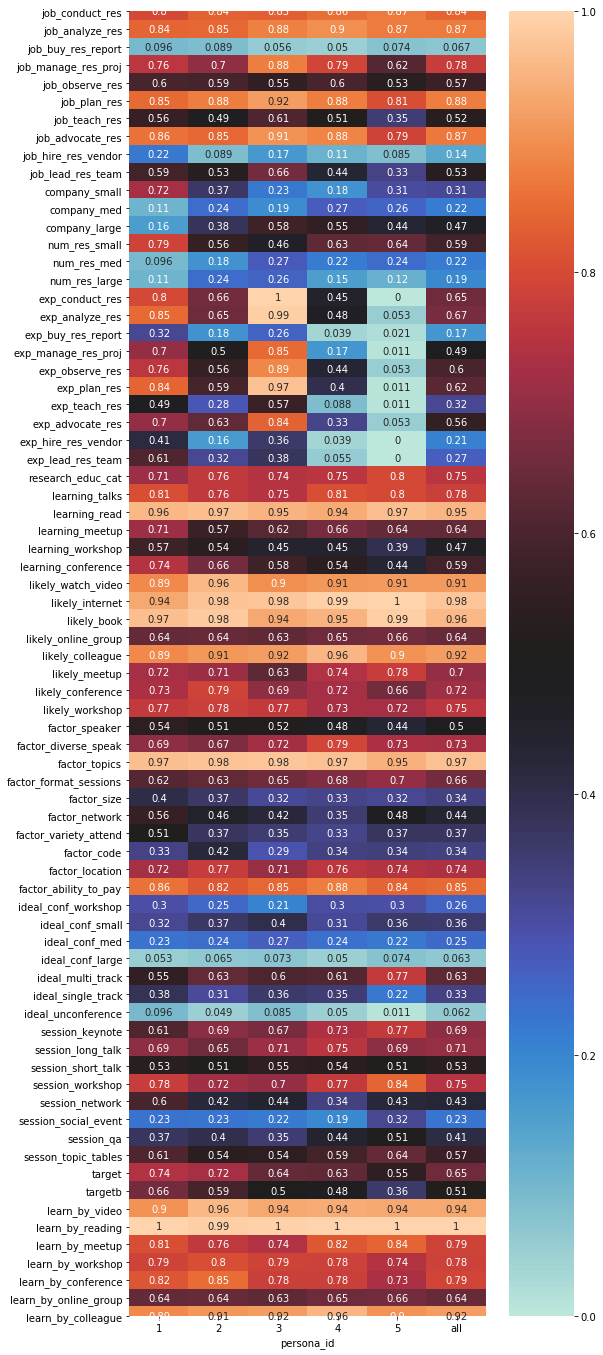

In [68]:
plt.figure(figsize=(8,24))
sns.heatmap(persona_recode2[[1, 2, 3, 4, 5, 'all']], annot=True, cmap='icefire')
# plt.savefig('heatmap.png')
plt.show()

In [69]:
persona2_means = (persona_recode2
    .melt(id_vars=['field'], var_name='persona_id', value_name='mean_val')
    .set_index(['field','persona_id'])
)
ifull(persona2_means)

,,mean_val
field,persona_id,
job_conduct_res,1,0.797872
job_analyze_res,1,0.840426
job_buy_res_report,1,0.095745
job_manage_res_proj,1,0.755319
job_observe_res,1,0.595745
job_plan_res,1,0.851064
job_teach_res,1,0.563830
job_advocate_res,1,0.861702
job_hire_res_vendor,1,0.223404


In [85]:
agg_df = dfrecode2.copy()
agg_df.persona_id = agg_df.persona_id.astype('object')
agg_df = agg_df.groupby(['persona_id']).agg(['sum','count','mean']).T
print('*** UNTIDY DATA ***')
ifull(agg_df)
agg_df = agg_df.reset_index()
agg_df.index_name='idx'
agg_df = agg_df.rename(columns={
    'level_0': 'field', 'level_1': 'stat'
})
# persona_recodeagg['idx'] = persona_recodeagg.index
# idx = persona_recodeagg.idx.apply(pd.Series)
# persona_recodeagg.drop(columns=['idx'], inplace=True)
# idx.columns = ['field', 'statistic']
# ifull(idx)
# persona_recodeagg = persona_recodeagg.join(idx)
agg_df = agg_df.melt(id_vars=['field', 'stat'], var_name='persona_id', value_name='calc_val')
agg_df = agg_df.pivot_table(values='calc_val', index=['field','persona_id'], columns='stat')

print('*** TIDY DATA ***')
ifull(agg_df)

*** UNTIDY DATA ***


persona_id                            1           2           3           4  \
job_conduct_res        sum    75.000000  103.000000  195.000000  155.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.797872    0.837398    0.833333    0.856354   
job_analyze_res        sum    79.000000  104.000000  206.000000  163.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.840426    0.845528    0.880342    0.900552   
job_buy_res_report     sum     9.000000   11.000000   13.000000    9.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.095745    0.089431    0.055556    0.049724   
job_manage_res_proj    sum    71.000000   86.000000  205.000000  143.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.755319    0.699187    0.876068    0.790055   
job_observe_res        sum    56.000000   73.000000  129.000000  108.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.595745    0.593496    0.551282    0.596685   
job_plan_res           sum    80.000000  108.000000  215.000000  159.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.851064    0.878049    0.918803    0.878453   
job_teach_res          sum    53.000000   60.000000  142.000000   93.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.563830    0.487805    0.606838    0.513812   
job_advocate_res       sum    81.000000  104.000000  212.000000  160.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.861702    0.845528    0.905983    0.883978   
job_hire_res_vendor    sum    21.000000   11.000000   39.000000   20.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.223404    0.089431    0.166667    0.110497   
job_lead_res_team      sum    55.000000   65.000000  154.000000   79.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.585106    0.528455    0.658120    0.436464   
company_small          sum    68.000000   45.000000   53.000000   32.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.723404    0.365854    0.226496    0.176796   
company_med            sum    10.000000   30.000000   44.000000   49.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.106383    0.243902    0.188034    0.270718   
company_large          sum    15.000000   47.000000  136.000000  100.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.159574    0.382114    0.581197    0.552486   
num_res_small          sum    74.000000   69.000000  108.000000  114.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.787234    0.560976    0.461538    0.629834   
num_res_med            sum     9.000000   22.000000   64.000000   39.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.095745    0.178862    0.273504    0.215470   
num_res_large          sum    10.000000   30.000000   61.000000   28.000000   
                       count  94.000000  123.000000  234.000000  181.000000   
                       mean    0.106383    0.243902    0.260684    0.154696   
exp_conduct_res        sum    75.000000   81.000000  234.000000   82.000000   
                       count  94.000000  123.00000

*** TIDY DATA ***


stat                               count      mean    sum
field                  persona_id                        
company_large          1            94.0  0.159574   15.0
                       2           123.0  0.382114   47.0
                       3           234.0  0.581197  136.0
                       4           181.0  0.552486  100.0
                       5            94.0  0.436170   41.0
company_med            1            94.0  0.106383   10.0
                       2           123.0  0.243902   30.0
                       3           234.0  0.188034   44.0
                       4           181.0  0.270718   49.0
                       5            94.0  0.255319   24.0
company_small          1            94.0  0.723404   68.0
                       2           123.0  0.365854   45.0
                       3           234.0  0.226496   53.0
                       4           181.0  0.176796   32.0
                       5            94.0  0.308511   29.0
exp_advocate_res       1            94.0  0.702128   66.0
                       2           123.0  0.634146   78.0
                       3           234.0  0.837607  196.0
                       4           181.0  0.325967   59.0
                       5            94.0  0.053191    5.0
exp_analyze_res        1            94.0  0.851064   80.0
                       2           123.0  0.650407   80.0
                       3           234.0  0.991453  232.0
                       4           181.0  0.475138   86.0
                       5            94.0  0.053191    5.0
exp_buy_res_report     1            94.0  0.319149   30.0
                       2           123.0  0.178862   22.0
                       3           234.0  0.260684   61.0
                       4           181.0  0.038674    7.0
                       5            94.0  0.021277    2.0
exp_conduct_res        1            94.0  0.797872   75.0
                       2           123.0  0.658537   81.0
                       3           234.0  1.000000  234.0
                       4           181.0  0.453039   82.0
                       5            94.0  0.000000    0.0
exp_hire_res_vendor    1            94.0  0.414894   39.0
                       2           123.0  0.162602   20.0
                       3           234.0  0.363248   85.0
                       4           181.0  0.038674    7.0
                       5            94.0  0.000000    0.0
exp_lead_res_team      1            94.0  0.606383   57.0
                       2           123.0  0.317073   39.0
                       3           234.0  0.376068   88.0
                       4           181.0  0.055249   10.0
                       5            94.0  0.000000    0.0
exp_manage_res_proj    1            94.0  0.702128   66.0
                       2           123.0  0.504065   62.0
                       3           234.0  0.850427  199.0
                       4           181.0  0.171271   31.0
                       5            94.0  0.010638    1.0
exp_observe_res        1            94.0  0.755319   71.0
                       2           123.0  0.560976   69.0
                       3           234.0  0.888889  208.0
                       4           181.0  0.436464   79.0
                       5            94.0  0.053191    5.0
exp_plan_res           1            94.0  0.840426   79.0
                       2           123.0  0.593496   73.0
                       3           234.0  0.970085  227.0
                       4           181.0  0.397790   72.0
                       5            94.0  0.010638    1.0
exp_teach_res          1            94.0  0.489362   46.0
                       2           123.0  0.284553   35.0
                       3           234.0  0.568376  133.0
                       4           181.0  0.088398   16.0
                       5            94.0  0.010638    1.0
factor_ability_to_pay  1            94.0  0.861702   81.0
                       2           123.0  0.821138  101.

,count,mean
job_conduct_res,726.0,0.840220
job_analyze_res,726.0,0.873278
job_buy_res_report,726.0,0.067493
job_manage_res_proj,726.0,0.775482
job_observe_res,726.0,0.573003
...,...,...
learn_by_meetup,726.0,0.786501
learn_by_workshop,726.0,0.783747
learn_by_conference,726.0,0.790634
learn_by_online_group,726.0,0.643251


In [261]:
# agg_dfall = dfrecode2.describe().T[['count', 'mean']].copy()
# agg_dfbw.targetb = agg_dfbw.targetb.astype('object')
# agg_dfbw = agg_dfbw.groupby(['targetb']).agg(['sum', 'count', 'mean']).T
# agg_dfbw['gain'] = np.array(agg_dfbw[1])-np.array(agg_dfbw[0])
# print('*** UNTIDY DATA ***')
# ifull(agg_dfall)
# agg_dfb = agg_dfbw.reset_index().copy()
# agg_dfb.index_name='idx'
# agg_dfb = agg_dfb.rename(columns={
#     'level_0': 'field', 'level_1': 'stat'
# })
# agg_dfb = agg_dfb.melt(id_vars=['field', 'stat'], var_name='targetb', value_name='calc_val')
# agg_dfb = agg_dfb.pivot_table(values='calc_val', index=['field','targetb'], columns='stat')

# print('*** TIDY DATA ***')
# ifull(agg_dfb)

In [205]:
agg_dfbw = dfrecode2.copy()
agg_dfbw.targetb = agg_dfbw.targetb.astype('object')
agg_dfbw = agg_dfbw.groupby(['targetb']).agg(['mean']).T
agg_dfbw['gain_net'] = np.array(agg_dfbw[1])-np.array(agg_dfbw[0])
agg_dfbw['gain_pct'] = np.array(agg_dfbw[1])/np.array(agg_dfbw[0])-1
print('*** UNTIDY DATA ***')
ifull(agg_dfbw)
agg_dfb = agg_dfbw.reset_index().copy()
agg_dfb.index_name='idx'
agg_dfb = agg_dfb.rename(columns={
    'level_0': 'field', 'level_1': 'stat'
})
# persona_recodeagg['idx'] = persona_recodeagg.index
# idx = persona_recodeagg.idx.apply(pd.Series)
# persona_recodeagg.drop(columns=['idx'], inplace=True)
# idx.columns = ['field', 'statistic']
# ifull(idx)
# persona_recodeagg = persona_recodeagg.join(idx)
agg_dfb = agg_dfb.melt(id_vars=['field', 'stat'], var_name='targetb', value_name='calc_val')
agg_dfb = agg_dfb.pivot_table(values='calc_val', index=['field','targetb'], columns='stat')

print('*** TIDY DATA ***')
ifull(agg_dfb)

*** UNTIDY DATA ***


,targetb,0,1,gain_net,gain_pct
job_conduct_res,mean,0.802260,0.876344,0.074084,0.092344
job_analyze_res,mean,0.833333,0.911290,0.077957,0.093548
job_buy_res_report,mean,0.067797,0.067204,-0.000592,-0.008737
job_manage_res_proj,mean,0.751412,0.798387,0.046975,0.062515
job_observe_res,mean,0.536723,0.607527,0.070804,0.131919
job_plan_res,mean,0.855932,0.900538,0.044605,0.052113
job_teach_res,mean,0.474576,0.572581,0.098004,0.206509
job_advocate_res,mean,0.872881,0.865591,-0.007290,-0.008352
job_hire_res_vendor,mean,0.138418,0.134409,-0.004009,-0.028966
job_lead_res_team,mean,0.514124,0.543011,0.028886,0.056186


*** TIDY DATA ***


stat                                 mean
field                  targetb           
company_large          0         0.477401
                       1         0.456989
                       gain_net -0.020412
                       gain_pct -0.042756
company_med            0         0.225989
                       1         0.206989
                       gain_net -0.018999
                       gain_pct -0.084073
company_small          0         0.293785
                       1         0.330645
                       gain_net  0.036860
                       gain_pct  0.125465
exp_advocate_res       0         0.536723
                       1         0.575269
                       gain_net  0.038546
                       gain_pct  0.071817
exp_analyze_res        0         0.646893
                       1         0.682796
                       gain_net  0.035903
                       gain_pct  0.055501
exp_buy_res_report     0         0.146893
                       1         0.188172
                       gain_net  0.041279
                       gain_pct  0.281017
exp_conduct_res        0         0.632768
                       1         0.666667
                       gain_net  0.033898
                       gain_pct  0.053571
exp_hire_res_vendor    0         0.189266
                       1         0.225806
                       gain_net  0.036541
                       gain_pct  0.193067
exp_lead_res_team      0         0.217514
                       1         0.314516
                       gain_net  0.097002
                       gain_pct  0.445957
exp_manage_res_proj    0         0.463277
                       1         0.524194
                       gain_net  0.060917
                       gain_pct  0.131491
exp_observe_res        0         0.564972
                       1         0.623656
                       gain_net  0.058684
                       gain_pct  0.103871
exp_plan_res           0         0.596045
                       1         0.647849
                       gain_net  0.051804
                       gain_pct  0.086913
exp_teach_res          0         0.290960
                       1         0.344086
                       gain_net  0.053126
                       gain_pct  0.182587
factor_ability_to_pay  0         0.864407
                       1         0.838710
                       gain_net -0.025697
                       gain_pct -0.029728
factor_code            0         0.324859
                       1         0.346774
                       gain_net  0.021915
                       gain_pct  0.067461
factor_diverse_speak   0         0.680791
                       1         0.774194
                       gain_net  0.093403
                       gain_pct  0.137197
factor_format_sessions 0         0.644068
                       1         0.672043
                       gain_net  0.027975
                       gain_pct  0.043435
factor_location        0         0.768362
                       1         0.706989
                       gain_net -0.061372
                       gain_pct -0.079874
factor_network         0         0.378531
                       1         0.491935
                       gain_net  0.113404
                       gain_pct  0.299591
factor_size            0         0.319209
                       1         0.357527
                       gain_net  0.038318
                       gain_pct  0.120040
factor_speaker         0         0.468927
                       1         0.526882
                       gain_net  0.057955
                       gain_pct  0.123591
factor_topics          0         0.963277
                       1         0.978495
                       gain_net  0.015218
                       gain_pct  0.015798
factor_variety_attend  0         0.333333
                       1         0.411290
                       gain_net  0.077957
                       gain_pct  0.233871
ideal_conf_large       0         0.070621
          

In [71]:
personatarget_recode2 = dfrecode2.groupby(['persona_id','target']).agg('mean')
# personatarget_recode2['mean'] = dfrecode2[target_recode2.index].mean()
ifull(personatarget_recode2)

job_conduct_res  job_analyze_res  job_buy_res_report  \
persona_id target                                                         
1          0.0            0.764706         0.764706            0.058824   
           0.5            0.800000         0.866667            0.066667   
           1.0            0.806452         0.854839            0.112903   
2          0.0            0.722222         0.722222            0.055556   
           0.5            0.750000         0.781250            0.125000   
           1.0            0.904110         0.904110            0.082192   
3          0.0            0.826923         0.826923            0.076923   
           0.5            0.727273         0.818182            0.106061   
           1.0            0.896552         0.939655            0.017241   
4          0.0            0.875000         0.925000            0.025000   
           0.5            0.833333         0.870370            0.055556   
           1.0            0.862069         0.908046            0.057471   
5          0.0            0.840000         0.920000            0.000000   
           0.5            0.857143         0.771429            0.057143   
           1.0            0.911765         0.941176            0.147059   

                   job_manage_res_proj  job_observe_res  job_plan_res  \
persona_id target                                                       
1          0.0                0.764706         0.588235      0.823529   
           0.5                0.733333         0.400000      0.933333   
           1.0                0.758065         0.645161      0.838710   
2          0.0                0.611111         0.666667      0.833333   
           0.5                0.531250         0.531250      0.812500   
           1.0                0.794521         0.602740      0.917808   
3          0.0                0.884615         0.442308      0.923077   
           0.5                0.878788         0.590909      0.893939   
           1.0                0.870690         0.577586      0.931034   
4          0.0                0.850000         0.500000      0.875000   
           0.5                0.740741         0.592593      0.833333   
           1.0                0.793103         0.643678      0.908046   
5          0.0                0.680000         0.400000      0.720000   
           0.5                0.542857         0.600000      0.828571   
           1.0                0.647059         0.558824      0.852941   

                   job_teach_res  job_advocate_res  job_hire_res_vendor  \
persona_id target                                                         
1          0.0          0.470588          0.882353             0.176471   
           0.5          0.600000          0.866667             0.200000   
           1.0          0.580645          0.854839             0.241935   
2          0.0          0.388889          0.944444             0.111111   
           0.5          0.468750          0.843750             0.125000   
           1.0          0.520548          0.821918             0.068493   
3          0.0          0.519231          0.865385             0.153846   
           0.5          0.606061          0.924242             0.227273   
           1.0          0.646552          0.913793             0.137931   
4          0.0          0.500000          0.800000             0.050000   
           0.5          0.444444          0.925926             0.129630   
           1.0          0.563218          0.896552             0.126437   
5          0.0          0.320000          0.760000             0.040000   
           0.5          0.285714          0.857143             0.114286   
           1.0          0.441176          0.735294             0.088235   

                   job_lead_res_team  company_small  company_med  \
persona_id target                                                  
1          0.0              0.705882       0.705882     0.235294   
           0.5       

In [72]:
target_recode2.columns.to_list()

[0.0, 0.5, 1.0, 'all']

In [73]:
df.num_employees.isin([0,1])

resp_id
284     True
288    False
294    False
281    False
280    False
       ...  
869    False
879    False
136    False
74     False
2      False
Name: num_employees, Length: 726, dtype: bool

In [74]:
qs_sessions = [
    'session_keynote',
    'session_long_talk',
    'session_short_talk',
    'session_workshop',
    'session_network',
    'session_social_event',
    'session_qa',
    'sesson_topic_tables',
]

In [75]:
qs_factors = [
    'factor_speaker',
    'factor_diverse_speak',
    'factor_topics',
    'factor_format_sessions',
    'factor_size',
    'factor_network',
    'factor_variety_attend',
    'factor_code',
    'factor_location',
    'factor_ability_to_pay',
]

In [76]:
qs_learning = [
    'learn_by_video',
    'learn_by_reading',
    'learn_by_meetup',
    'learn_by_workshop',
#     'learn_by_conference',
    'learn_by_online_group',
    'learn_by_colleague'
]

In [235]:
qs_nonfactor = [
    'learning_talks',
    'learning_read',
    'learning_meetup',
    'learning_conference',
    'learning_workshop',
    'likely_watch_video',
    'likely_internet',
    'likely_book',
    'likely_online_group',
    'likely_colleague',
    'likely_meetup',
    'likely_workshop', 
    'likely_conference',
    'learn_by_conference',
    'target',
]

In [236]:
idx = pd.IndexSlice
agg_df.loc[idx[qs_learning, [1]], ['mean']].sort_values(by='mean', ascending=False).head(3)


,stat,mean
field,persona_id,
learn_by_reading,1,1.000000
learn_by_video,1,0.904255
learn_by_colleague,1,0.893617


In [237]:
personas = wrangle.persona_names
for l in [qs_sessions, qs_factors, qs_learning]:
    for p in personas:
        print(f'{p}: {personas[p]}')
        display(agg_df.loc[idx[l, [p]], ['mean']].sort_values(by='mean', ascending=False).head(5))

1: Executives and Consultants


,stat,mean
field,persona_id,
session_workshop,1,0.776596
session_long_talk,1,0.691489
session_keynote,1,0.606383
sesson_topic_tables,1,0.606383
session_network,1,0.595745


2: Specialists


,stat,mean
field,persona_id,
session_workshop,2,0.715447
session_keynote,2,0.691057
session_long_talk,2,0.650407
sesson_topic_tables,2,0.536585
session_short_talk,2,0.512195


3: Very Experienced Researchers and Designers


,stat,mean
field,persona_id,
session_long_talk,3,0.713675
session_workshop,3,0.700855
session_keynote,3,0.666667
session_short_talk,3,0.547009
sesson_topic_tables,3,0.542735


4: Somewhat Experienced Researchers


,stat,mean
field,persona_id,
session_workshop,4,0.767956
session_long_talk,4,0.751381
session_keynote,4,0.734807
sesson_topic_tables,4,0.585635
session_short_talk,4,0.535912


5: Less Experienced Researchers


,stat,mean
field,persona_id,
session_workshop,5,0.840426
session_keynote,5,0.765957
session_long_talk,5,0.691489
sesson_topic_tables,5,0.638298
session_qa,5,0.510638


1: Executives and Consultants


,stat,mean
field,persona_id,
factor_topics,1,0.968085
factor_ability_to_pay,1,0.861702
factor_location,1,0.723404
factor_diverse_speak,1,0.691489
factor_format_sessions,1,0.617021


2: Specialists


,stat,mean
field,persona_id,
factor_topics,2,0.975610
factor_ability_to_pay,2,0.821138
factor_location,2,0.772358
factor_diverse_speak,2,0.674797
factor_format_sessions,2,0.634146


3: Very Experienced Researchers and Designers


,stat,mean
field,persona_id,
factor_topics,3,0.978632
factor_ability_to_pay,3,0.846154
factor_diverse_speak,3,0.722222
factor_location,3,0.705128
factor_format_sessions,3,0.653846


4: Somewhat Experienced Researchers


,stat,mean
field,persona_id,
factor_topics,4,0.972376
factor_ability_to_pay,4,0.878453
factor_diverse_speak,4,0.790055
factor_location,4,0.756906
factor_format_sessions,4,0.679558


5: Less Experienced Researchers


,stat,mean
field,persona_id,
factor_topics,5,0.946809
factor_ability_to_pay,5,0.840426
factor_location,5,0.744681
factor_diverse_speak,5,0.734043
factor_format_sessions,5,0.702128


1: Executives and Consultants


,stat,mean
field,persona_id,
learn_by_reading,1,1.000000
learn_by_video,1,0.904255
learn_by_colleague,1,0.893617
learn_by_conference,1,0.819149
learn_by_meetup,1,0.808511


2: Specialists


,stat,mean
field,persona_id,
learn_by_reading,2,0.991870
learn_by_video,2,0.959350
learn_by_colleague,2,0.910569
learn_by_conference,2,0.853659
learn_by_workshop,2,0.804878


3: Very Experienced Researchers and Designers


,stat,mean
field,persona_id,
learn_by_reading,3,0.995726
learn_by_video,3,0.935897
learn_by_colleague,3,0.918803
learn_by_workshop,3,0.786325
learn_by_conference,3,0.777778


4: Somewhat Experienced Researchers


,stat,mean
field,persona_id,
learn_by_reading,4,1.000000
learn_by_colleague,4,0.955801
learn_by_video,4,0.939227
learn_by_meetup,4,0.823204
learn_by_workshop,4,0.784530


5: Less Experienced Researchers


,stat,mean
field,persona_id,
learn_by_reading,5,1.000000
learn_by_video,5,0.936170
learn_by_colleague,5,0.904255
learn_by_meetup,5,0.840426
learn_by_workshop,5,0.744681


In [260]:
targets = {
    0: 'Not likely to attend',
    1: 'Likely to attend',
#     'gain': 'Increase if likely to attend'
}
for l in [qs_sessions, qs_factors, qs_learning]: 
    for b in targets:
        print(f'{b}: {targets[b]}')
        display(agg_dfb.loc[idx[l, [b]], ['mean']].sort_values(by='mean', ascending=False).head(5))

0: Not likely to attend


,stat,mean
field,targetb,
session_workshop,0,0.731638
session_keynote,0,0.692090
session_long_talk,0,0.669492
sesson_topic_tables,0,0.564972
session_short_talk,0,0.497175


1: Likely to attend


,stat,mean
field,targetb,
session_workshop,1,0.763441
session_long_talk,1,0.741935
session_keynote,1,0.693548
sesson_topic_tables,1,0.580645
session_short_talk,1,0.564516


0: Not likely to attend


,stat,mean
field,targetb,
factor_topics,0,0.963277
factor_ability_to_pay,0,0.864407
factor_location,0,0.768362
factor_diverse_speak,0,0.680791
factor_format_sessions,0,0.644068


1: Likely to attend


,stat,mean
field,targetb,
factor_topics,1,0.978495
factor_ability_to_pay,1,0.838710
factor_diverse_speak,1,0.774194
factor_location,1,0.706989
factor_format_sessions,1,0.672043


0: Not likely to attend


,stat,mean
field,targetb,
learn_by_reading,0,0.994350
learn_by_video,0,0.937853
learn_by_colleague,0,0.903955
learn_by_meetup,0,0.703390
learn_by_workshop,0,0.635593


1: Likely to attend


,stat,mean
field,targetb,
learn_by_conference,1,1.000000
learn_by_reading,1,1.000000
learn_by_colleague,1,0.938172
learn_by_video,1,0.935484
learn_by_workshop,1,0.924731


In [253]:
# agg_cols=agg_dfb.reset_index().field.to_list()


# agg_cols

In [226]:
agg_dfb_cols = set(agg_dfb.reset_index().field.to_list())

In [232]:
qs_nonfactor

['learning_talks',
 'learning_read',
 'learning_meetup',
 'learning_conference',
 'learning_workshop',
 'likely_watch_video',
 'likely_internet',
 'likely_book',
 'likely_online_group',
 'likely_colleague',
 'likely_meetup',
 'likely_workshop',
 'likely_conference',
 'learn_by_confernce',
 'target']

In [233]:
keep_cols_agg_dfb=[col for col in set(agg_dfb.reset_index().field.to_list()) if col not in qs_nonfactor]
keep_cols_agg_dfb

['learn_by_reading',
 'factor_variety_attend',
 'exp_conduct_res',
 'num_res_med',
 'ideal_single_track',
 'factor_speaker',
 'ideal_unconference',
 'job_lead_res_team',
 'factor_diverse_speak',
 'exp_hire_res_vendor',
 'exp_teach_res',
 'learn_by_conference',
 'learn_by_meetup',
 'factor_size',
 'num_res_large',
 'session_keynote',
 'learn_by_workshop',
 'session_social_event',
 'factor_ability_to_pay',
 'num_res_small',
 'exp_observe_res',
 'ideal_conf_large',
 'job_plan_res',
 'session_workshop',
 'exp_lead_res_team',
 'sesson_topic_tables',
 'factor_code',
 'exp_manage_res_proj',
 'job_teach_res',
 'learn_by_colleague',
 'factor_format_sessions',
 'job_analyze_res',
 'ideal_multi_track',
 'company_small',
 'job_conduct_res',
 'exp_advocate_res',
 'job_buy_res_report',
 'factor_network',
 'learn_by_video',
 'company_med',
 'factor_location',
 'job_advocate_res',
 'learn_by_online_group',
 'exp_plan_res',
 'exp_analyze_res',
 'ideal_conf_workshop',
 'session_long_talk',
 'session_sho

In [252]:

agg_dfbgain = agg_dfb.loc[idx[[col for col in set(agg_dfb.reset_index().field.to_list()) if col not in qs_nonfactor],['gain_net', 'gain_pct']],].copy()
# agg_dfbgain=agg_dfbgain.loc[idx[,:],]
agg_dfbgain['mvmt'] = agg_dfbgain['mean'].abs()
agg_dfbgain = agg_dfbgain.sort_values(by='mvmt', ascending=False).drop(columns='mvmt')


ifull(agg_dfbgain.loc[idx[:,'gain_pct'],])

,stat,mean
field,targetb,
learn_by_workshop,gain_pct,0.454910
exp_lead_res_team,gain_pct,0.445957
ideal_conf_med,gain_pct,0.381794
factor_network,gain_pct,0.299591
exp_buy_res_report,gain_pct,0.281017
factor_variety_attend,gain_pct,0.233871
num_res_large,gain_pct,0.232417
learn_by_meetup,gain_pct,0.230600
job_teach_res,gain_pct,0.206509


In [230]:
means_dfb = agg_dfbw.loc[
    idx[
        [col for col in set(agg_dfbw.reset_index().level_0.to_list()) if col not in qs_nonfactor],
        ['mean']],idx[[0,1]]
    ]

In [259]:
agg_dfmeans = (agg_dfbw
               .loc[
                   idx[
                       [col for col in set(agg_dfbw.reset_index().level_0.to_list()) if col not in qs_nonfactor]
                       ,['mean']]
                   ,]
               .reset_index()
               .drop(columns=['level_1'])
               .rename(columns={
                   'level_0':'field',
                   0:'not_likely',
                   1:'likely'
               })
               .copy()
              )
agg_dfmeans['abs_pct'] = agg_dfmeans.gain_pct.abs()
agg_dfmeans['abs_net'] = agg_dfmeans.gain_net.abs()
agg_dfmeans = (agg_dfmeans[agg_dfmeans.abs_net > .075]
               .sort_values(by='abs_pct', ascending=False)
               .drop(columns=['abs_pct','abs_net'])
              )
agg_dfmeans.head(10)

targetb,field,not_likely,likely,gain_net,gain_pct
55,learn_by_workshop,0.635593,0.924731,0.289138,0.454910
25,exp_lead_res_team,0.217514,0.314516,0.097002,0.445957
39,ideal_conf_med,0.206215,0.284946,0.078732,0.381794
32,factor_network,0.378531,0.491935,0.113404,0.299591
33,factor_variety_attend,0.333333,0.411290,0.077957,0.233871
54,learn_by_meetup,0.703390,0.865591,0.162202,0.230600
6,job_teach_res,0.474576,0.572581,0.098004,0.206509
48,session_network,0.392655,0.467742,0.075087,0.191228
28,factor_diverse_speak,0.680791,0.774194,0.093403,0.137197
56,learn_by_online_group,0.604520,0.680108,0.075588,0.125038


### Notable Movers
***Likely attendees compared to unlikely attendees***

- **Learns by Attending Workshops**: up 29 points, 45% more likely to attend.
- **Experience Leading Research Teams**: up 10 points, 45% more likely.
- **Ideal Conference Size Medium**: up 8 points, 38% more likely.
- **Networking is an Important Factor**: up 11 points, 30% more likely.
- **Variety of Attendees is an Important Factor**: up 8 points, 23% more likely.
- **Learns by Attending Meetups**: up 16 points, 23% more likely.
- **Job Involves Teaching Research**: up 10 points, 21% more likely.
- **Values Networking Opportunities**: up 8 points, 19% more likely.
- **Diversity of Speakers is an Important Factor**: up 9 points, 14% more likely.
- **Learns by Consulting On-line Groups**: up 8 points, 13% more likely.

**Conference-goers are more likely to purchase other learning methods. If they come to your conference, sell them a book.**